In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
# from pandas_profiling import ProfileReport # DEPRECATED
#from ydata_profiling import ProfileReport

from IPython.display import display
sns.set(style="white", color_codes=True)
labelencoder=LabelEncoder()

In [3]:
# Load the dataset
file_path = 'mxmh_survey_results.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [4]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [5]:
#df=df.drop('BPM', axis=1)
#df=df.drop('Timestamp', axis=1)

In [6]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median
df.iloc[:,:] = mean_imputer.fit_transform(df)

In [7]:
df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           736 non-null    float64
 2   Primary streaming service     736 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 736 non-null    object 
 5   Instrumentalist               736 non-null    object 
 6   Composer                      736 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             736 non-null    object 
 10  BPM                           736 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

### For Balancing

Text(0.5, 1.0, 'Samples per Class')

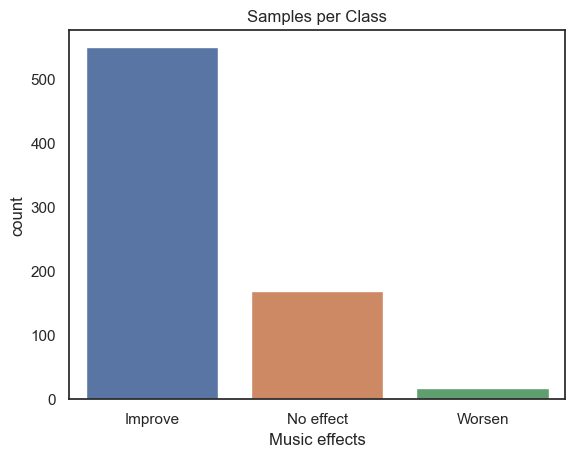

In [8]:
sns.countplot(df, x="Music effects")
plt.title('Samples per Class')

In [16]:
counts = df['Music effects'].value_counts()
num_samples = min(counts)
print(df['Music effects'].value_counts())

Music effects
Improve      550
No effect    169
Worsen        17
Name: count, dtype: int64


In [17]:
df_balanced = pd.DataFrame()
# Iterate through classes and downsample
for c in df['Music effects'].unique():
    df_class = df[df['Music effects'] == c]
    df_class_balanced = resample(df_class,
                                 replace=False,
                                 n_samples=num_samples,
                                 random_state=42)
    df_balanced = pd.concat([df_balanced, df_class_balanced])

print(df_balanced['Music effects'].value_counts())

Music effects
Improve      17
No effect    17
Worsen       17
Name: count, dtype: int64


Text(0.5, 1.0, 'Samples per Class')

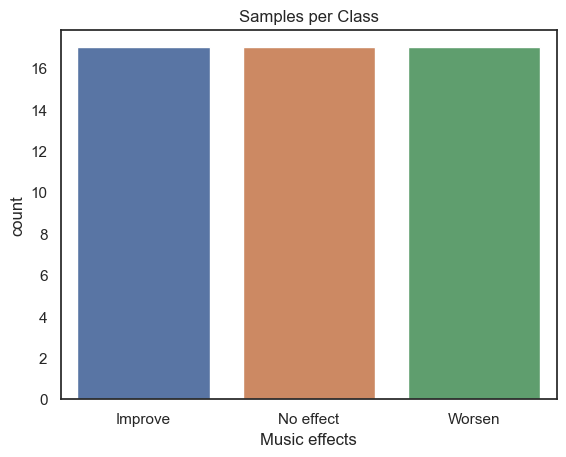

In [18]:
sns.countplot(df_balanced, x="Music effects")
plt.title('Samples per Class')

### Sperating Features And Labels

In [9]:

#X=df.drop(['Anxiety'],axis=1)

Anxiety_X = df[['Age','Hours per day','Depression','Insomnia','OCD','BPM', 'Frequency [Pop]', 'Frequency [Rock]', 'Frequency [Metal]']] #if you want specific columns in X
Anxiety_Y = df['Anxiety'] #objects or class

Insomnia_X = df[['Age','Hours per day','Depression','Anxiety','OCD','BPM']] #if you want specific columns in X (features)
Insomnia_Y = df['Insomnia']

Depression_X = df[['Age','Hours per day','Insomnia','Anxiety','OCD','BPM']] #if you want specific columns in X
Depression_Y = df['Depression']

OCD_X = df[['Age','Hours per day','Insomnia','Anxiety','Depression','BPM']] #if you want specific columns in X
OCD_Y = df['OCD']
# Y_nparray = to_categorical(labelencoder.fit_transform(Y)) #if label column is textual
# Y = np.argmax(Y_nparray, axis=1) #if label column is textual

### converting Textual Features to Number

In [10]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Convert textual data to numeric
# Check feature types
def textToNumerical (X):
    text_features = X.select_dtypes(include=['object'])

    if not text_features.empty:
        # Create one-hot encoding of textual features
        oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
        X_encoded = oh_encoder.fit_transform(text_features)

        # Convert the encoded array back to a DataFrame
        X_encoded_df = pd.DataFrame(X_encoded, columns=oh_encoder.get_feature_names_out(text_features.columns))

        # Join one-hot encoded columns back to the main DataFrame
        X_transformed = X.drop(columns=text_features.columns)
        X_transformed = pd.concat([X_transformed, X_encoded_df], axis=1)
        X = X_transformed
    return X

In [11]:
Anxiety_X = textToNumerical(Anxiety_X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Train Test Split

In [12]:
Anxiety_X_train, Anxiety_X_test, Anxiety_Y_train, Anxiety_Y_test = train_test_split(Anxiety_X, Anxiety_Y, test_size=0.2, random_state=50)
Insomnia_X_train, Insomnia_X_test, Insomnia_Y_train, Insomnia_Y_test = train_test_split(Insomnia_X, Insomnia_Y, test_size=0.2, random_state=50)
Depression_X_train, Depression_X_test, Depression_Y_train, Depression_Y_test = train_test_split(Depression_X, Depression_Y, test_size=0.2, random_state=50)
OCD_X_train, OCD_X_test, OCD_Y_train, OCD_Y_test = train_test_split(OCD_X, OCD_Y, test_size=0.2, random_state=50)

In [13]:
import joblib
def scaleTheData(X_train,X_test):
    pipeline = Pipeline([
    ('std_scalar', StandardScaler())
    ])

    X_train = pipeline.fit_transform(X_train)
    X_test = pipeline.transform(X_test)
    joblib.dump(pipeline, 'best_pipeline.pkl')
    return X_train,X_test

In [14]:
Anxiety_X_train, Anxiety_X_test=scaleTheData(Anxiety_X_train, Anxiety_X_test)
Insomnia_X_train, Insomnia_X_test=scaleTheData(Insomnia_X_train, Insomnia_X_test)
Depression_X_train, Depression_X_test=scaleTheData(Depression_X_train, Depression_X_test)
OCD_X_train, OCD_X_test=scaleTheData(OCD_X_train, OCD_X_test)

## Regression

In [12]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import joblib


def trainAllModels(X_train,X_test,Y_train,Y_test):
    # Define the models
    models = {
        'Linear Regression': LinearRegression(),
        'Lasso Regression': Lasso(),
        'Ridge Regression': Ridge(),
        'SVM Regression': SVR(),
        'Random Forest Regression': RandomForestRegressor(n_estimators=100),
        'XGBoost Regression': XGBRegressor(n_estimators=100),
        'KNN Regression': KNeighborsRegressor()
    }

    # Add a stacking ensemble model
    ensemble_model = StackingRegressor(
        estimators=list(models.items()),
        final_estimator=LinearRegression()
    )
    models['Stacking Ensemble'] = ensemble_model

    # Initialize variables to track the best model
    best_rmse = float("inf")
    best_r2 = -float("inf")
    best_model = None
    # Train and evaluate each model
    for name, model in models.items():
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-np.mean(cv_scores))

        # Fit the model on the entire training set
        model.fit(X_train, Y_train)

        # Make predictions on the test set
        predictions = model.predict(X_test)

        # Calculate RMSE and R^2
        rmse = np.sqrt(mean_squared_error(Y_test, predictions))
        r2 = r2_score(Y_test, predictions)

        print(f'{name} - CV RMSE: {cv_rmse:.3f}, Test RMSE: {rmse:.3f}, Test R^2: {r2:.3f}')

        # Update the best model if this one is better
        if rmse < best_rmse:
            best_rmse = rmse
            best_r2 = r2
            best_model = model

    # Print the best model's details
    print(f'Best model: {best_model}')
    print(f'Test RMSE: {best_rmse:.3f}')
    print(f'Test R^2: {best_r2:.3f}')

    # Save the best model
    joblib.dump(best_model, 'best_model.pkl')
    return model

In [16]:
A_model=trainAllModels(Anxiety_X_train,Anxiety_X_test,Anxiety_Y_train,Anxiety_Y_test)

Linear Regression - CV RMSE: 41626.944, Test RMSE: 2.159, Test R^2: 0.330
Lasso Regression - CV RMSE: 2.624, Test RMSE: 2.402, Test R^2: 0.171
Ridge Regression - CV RMSE: 2.305, Test RMSE: 2.159, Test R^2: 0.330
SVM Regression - CV RMSE: 2.384, Test RMSE: 2.194, Test R^2: 0.308
Random Forest Regression - CV RMSE: 2.377, Test RMSE: 2.202, Test R^2: 0.303
XGBoost Regression - CV RMSE: 2.686, Test RMSE: 2.317, Test R^2: 0.229
KNN Regression - CV RMSE: 2.642, Test RMSE: 2.401, Test R^2: 0.172
Stacking Ensemble - CV RMSE: 20856.006, Test RMSE: 2.147, Test R^2: 0.337
Best model: StackingRegressor(estimators=[('Linear Regression', LinearRegression()),
                              ('Lasso Regression', Lasso()),
                              ('Ridge Regression', Ridge()),
                              ('SVM Regression', SVR()),
                              ('Random Forest Regression',
                               RandomForestRegressor()),
                              ('XGBoost Regression',

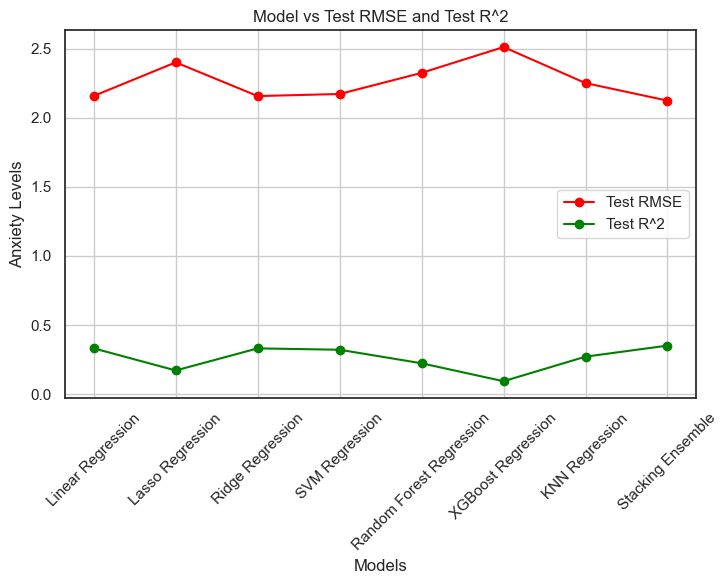

                      Model    CV RMSE  Test RMSE  Test R^2
0         Linear Regression  93382.940      2.159     0.331
1          Lasso Regression      2.624      2.402     0.171
2          Ridge Regression      2.307      2.158     0.331
3            SVM Regression      2.361      2.173     0.321
4  Random Forest Regression      2.423      2.326     0.223
5        XGBoost Regression      2.713      2.513     0.093
6            KNN Regression      2.468      2.252     0.271
7         Stacking Ensemble  29456.713      2.125     0.351


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
models = [
    "Linear Regression", "Lasso Regression", "Ridge Regression",
    "SVM Regression", "Random Forest Regression", "XGBoost Regression",
    "KNN Regression", "Stacking Ensemble"
]

cv_rmse = [93382.940, 2.624, 2.307, 2.361, 2.423, 2.713, 2.468, 29456.713]
test_rmse = [2.159, 2.402, 2.158, 2.173, 2.326, 2.513, 2.252, 2.125]
test_r2 = [0.331, 0.171, 0.331, 0.321, 0.223, 0.093, 0.271, 0.351]

# Creating the DataFrame
data = pd.DataFrame({
    'Model': models,
    'CV RMSE': cv_rmse,
    'Test RMSE': test_rmse,
    'Test R^2': test_r2
})

# Plotting
plt.figure(figsize=(14, 6))

# # Line graph for CV RMSE
# plt.subplot(1, 2, 1)
# plt.plot(models, cv_rmse, marker='o', color='blue', label='CV RMSE')
# plt.xticks(rotation=45)
# plt.title('Model vs CV RMSE')
# plt.xlabel('Model')
# plt.ylabel('CV RMSE')
# plt.grid(True)
# plt.yscale('log')  # log scale to handle large range in values

# Line graph for Test RMSE and Test R²
plt.subplot(1, 2, 2)
plt.plot(models, test_rmse, marker='o', color='red', label='Test RMSE')
plt.plot(models, test_r2, marker='o', color='green', label='Test R^2')
plt.xticks(rotation=45)
plt.title('Model vs Test RMSE and Test R^2')
plt.xlabel('Models')
plt.ylabel('Anxiety Levels')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print(data)

In [18]:
I_model=trainAllModels(Insomnia_X_train,Insomnia_X_test,Insomnia_Y_train,Insomnia_Y_test)

Linear Regression - CV RMSE: 74440.193, Test RMSE: 2.618, Test R^2: 0.286
Lasso Regression - CV RMSE: 3.073, Test RMSE: 3.073, Test R^2: 0.017
Ridge Regression - CV RMSE: 2.854, Test RMSE: 2.618, Test R^2: 0.286
SVM Regression - CV RMSE: 2.969, Test RMSE: 2.624, Test R^2: 0.283
Random Forest Regression - CV RMSE: 3.013, Test RMSE: 2.738, Test R^2: 0.220
XGBoost Regression - CV RMSE: 3.249, Test RMSE: 3.103, Test R^2: -0.003
KNN Regression - CV RMSE: 3.055, Test RMSE: 2.815, Test R^2: 0.175
Stacking Ensemble - CV RMSE: 34157.668, Test RMSE: 2.621, Test R^2: 0.285
Best model: LinearRegression()
Test RMSE: 2.618
Test R^2: 0.286


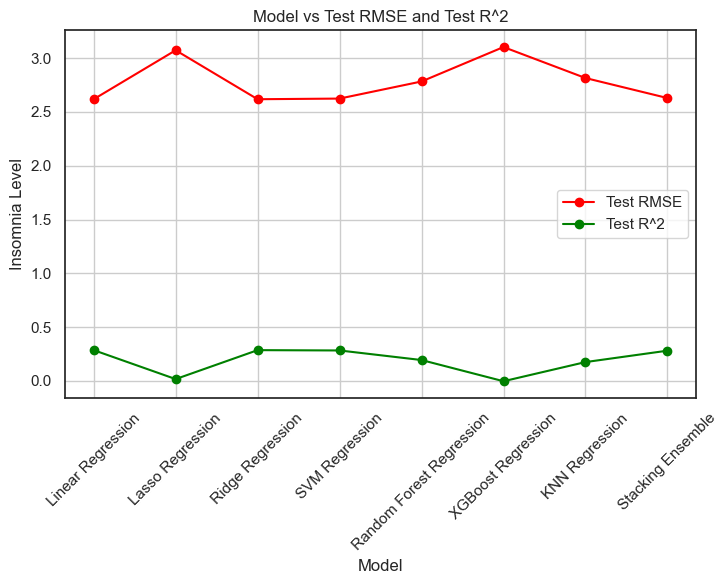

                      Model    CV RMSE  Test RMSE  Test R^2
0         Linear Regression  93382.940      2.159     0.331
1          Lasso Regression      2.624      2.402     0.171
2          Ridge Regression      2.307      2.158     0.331
3            SVM Regression      2.361      2.173     0.321
4  Random Forest Regression      2.423      2.326     0.223
5        XGBoost Regression      2.713      2.513     0.093
6            KNN Regression      2.468      2.252     0.271
7         Stacking Ensemble  29456.713      2.125     0.351


In [19]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Data for model performance metrics
models_new = [
    "Linear Regression", "Lasso Regression", "Ridge Regression",
    "SVM Regression", "Random Forest Regression", "XGBoost Regression",
    "KNN Regression", "Stacking Ensemble"
]

cv_rmse_new = [74440.193, 3.073, 2.854, 2.969, 3.010, 3.249, 3.055, 34326.810]
test_rmse_new = [2.618, 3.073, 2.618, 2.624, 2.783, 3.103, 2.815, 2.629]
test_r2_new = [0.286, 0.017, 0.286, 0.283, 0.194, -0.003, 0.175, 0.281]

# Creating the DataFrame with the new data
data_new = pd.DataFrame({
    'Model': models_new,
    'CV RMSE': cv_rmse_new,
    'Test RMSE': test_rmse_new,
    'Test R^2': test_r2_new
})

# Plotting the data
plt.figure(figsize=(14, 6))

# Line graph for Test RMSE and Test R²
plt.subplot(1, 2, 2)
plt.plot(models_new, test_rmse_new, marker='o', color='red', label='Test RMSE')
plt.plot(models_new, test_r2_new, marker='o', color='green', label='Test R^2')
plt.xticks(rotation=45)
plt.title('Model vs Test RMSE and Test R^2')
plt.xlabel('Model')
plt.ylabel('Insomnia Level')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Display the table
print(data)


In [20]:
D_model=trainAllModels(Depression_X_train,Depression_X_test,Depression_Y_train,Depression_Y_test)

Linear Regression - CV RMSE: 80738.784, Test RMSE: 2.706, Test R^2: 0.343
Lasso Regression - CV RMSE: 2.711, Test RMSE: 3.107, Test R^2: 0.133
Ridge Regression - CV RMSE: 2.448, Test RMSE: 2.706, Test R^2: 0.342
SVM Regression - CV RMSE: 2.479, Test RMSE: 2.644, Test R^2: 0.372
Random Forest Regression - CV RMSE: 2.530, Test RMSE: 2.758, Test R^2: 0.317
XGBoost Regression - CV RMSE: 2.785, Test RMSE: 2.854, Test R^2: 0.268
KNN Regression - CV RMSE: 2.590, Test RMSE: 2.845, Test R^2: 0.273
Stacking Ensemble - CV RMSE: 85540.725, Test RMSE: 2.676, Test R^2: 0.357
Best model: SVR()
Test RMSE: 2.644
Test R^2: 0.372


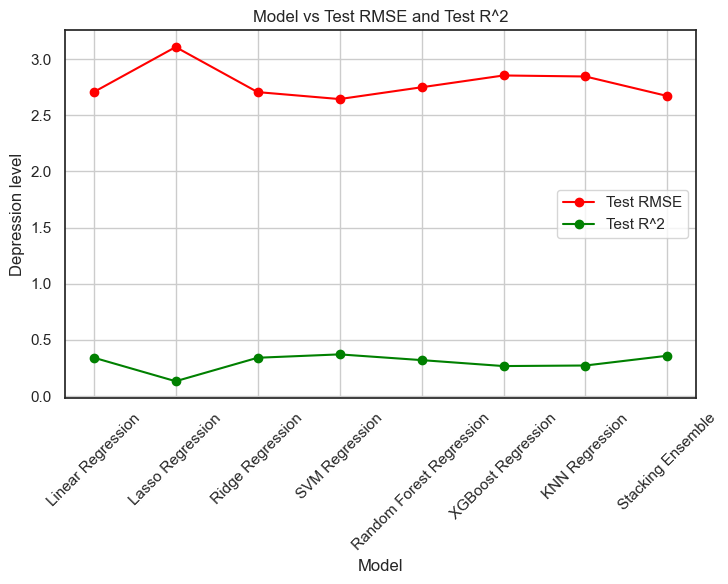

                      Model    CV RMSE  Test RMSE  Test R^2
0         Linear Regression  93382.940      2.159     0.331
1          Lasso Regression      2.624      2.402     0.171
2          Ridge Regression      2.307      2.158     0.331
3            SVM Regression      2.361      2.173     0.321
4  Random Forest Regression      2.423      2.326     0.223
5        XGBoost Regression      2.713      2.513     0.093
6            KNN Regression      2.468      2.252     0.271
7         Stacking Ensemble  29456.713      2.125     0.351


In [21]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Data for model performance metrics
models_new = [
    "Linear Regression", "Lasso Regression", "Ridge Regression",
    "SVM Regression", "Random Forest Regression", "XGBoost Regression",
    "KNN Regression", "Stacking Ensemble"
]

# Values for each metric
cv_rmse_new = [80738.784, 2.711, 2.448, 2.479, 2.533, 2.785, 2.590, 92893.792]
test_rmse_new = [2.706, 3.107, 2.706, 2.644, 2.749, 2.854, 2.845, 2.671]
test_r2_new = [0.343, 0.133, 0.342, 0.372, 0.321, 0.268, 0.273, 0.360]

# Creating the DataFrame with the new data
data_new = pd.DataFrame({
    'Model': models_new,
    'CV RMSE': cv_rmse_new,
    'Test RMSE': test_rmse_new,
    'Test R^2': test_r2_new
})

# Plotting the data
plt.figure(figsize=(14, 6))

# Line graph for Test RMSE and Test R²
plt.subplot(1, 2, 2)
plt.plot(models_new, test_rmse_new, marker='o', color='red', label='Test RMSE')
plt.plot(models_new, test_r2_new, marker='o', color='green', label='Test R^2')
plt.xticks(rotation=45)
plt.title('Model vs Test RMSE and Test R^2')
plt.xlabel('Model')
plt.ylabel('Depression level')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Display the table
print(data)


In [22]:
OCD_model=trainAllModels(OCD_X_train,OCD_X_test,OCD_Y_train,OCD_Y_test)

Linear Regression - CV RMSE: 63174.399, Test RMSE: 2.566, Test R^2: 0.089
Lasso Regression - CV RMSE: 2.869, Test RMSE: 2.684, Test R^2: 0.004
Ridge Regression - CV RMSE: 2.656, Test RMSE: 2.566, Test R^2: 0.089
SVM Regression - CV RMSE: 2.814, Test RMSE: 2.619, Test R^2: 0.051
Random Forest Regression - CV RMSE: 2.806, Test RMSE: 2.766, Test R^2: -0.058
XGBoost Regression - CV RMSE: 3.114, Test RMSE: 3.004, Test R^2: -0.248
KNN Regression - CV RMSE: 2.901, Test RMSE: 2.713, Test R^2: -0.019
Stacking Ensemble - CV RMSE: 86364.295, Test RMSE: 2.587, Test R^2: 0.074
Best model: LinearRegression()
Test RMSE: 2.566
Test R^2: 0.089


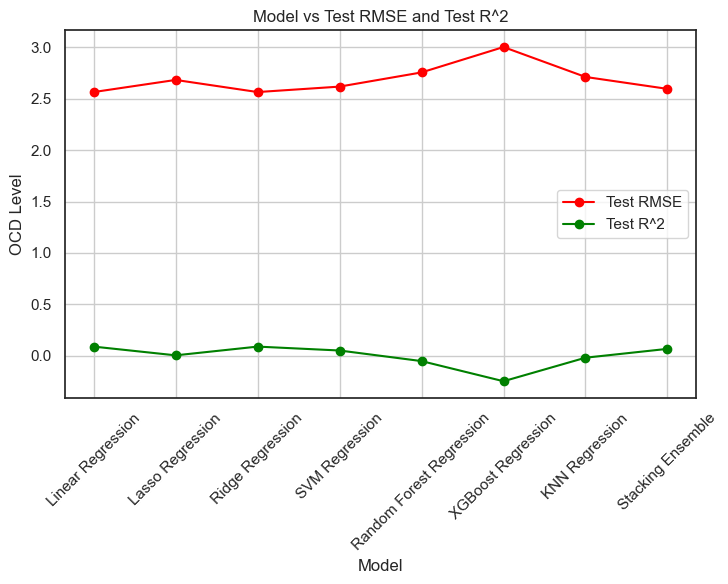

                      Model    CV RMSE  Test RMSE  Test R^2
0         Linear Regression  93382.940      2.159     0.331
1          Lasso Regression      2.624      2.402     0.171
2          Ridge Regression      2.307      2.158     0.331
3            SVM Regression      2.361      2.173     0.321
4  Random Forest Regression      2.423      2.326     0.223
5        XGBoost Regression      2.713      2.513     0.093
6            KNN Regression      2.468      2.252     0.271
7         Stacking Ensemble  29456.713      2.125     0.351


In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Data for model performance metrics
models_new = [
    "Linear Regression", "Lasso Regression", "Ridge Regression",
    "SVM Regression", "Random Forest Regression", "XGBoost Regression",
    "KNN Regression", "Stacking Ensemble"
]

# Values for each metric
cv_rmse_new = [63174.399, 2.869, 2.656, 2.814, 2.784, 3.114, 2.901, 85556.456]
test_rmse_new = [2.566, 2.684, 2.566, 2.619, 2.757, 3.004, 2.713, 2.597]
test_r2_new = [0.089, 0.004, 0.089, 0.051, -0.052, -0.248, -0.019, 0.067]

# Creating the DataFrame with the new data
data_new = pd.DataFrame({
    'Model': models_new,
    'CV RMSE': cv_rmse_new,
    'Test RMSE': test_rmse_new,
    'Test R^2': test_r2_new
})

# Plotting the data
plt.figure(figsize=(14, 6))


# Line graph for Test RMSE and Test R²
plt.subplot(1, 2, 2)
plt.plot(models_new, test_rmse_new, marker='o', color='red', label='Test RMSE')
plt.plot(models_new, test_r2_new, marker='o', color='green', label='Test R^2')
plt.xticks(rotation=45)
plt.title('Model vs Test RMSE and Test R^2')
plt.xlabel('Model')
plt.ylabel('OCD Level')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Display the table
print(data)

# CNN

In [23]:
from keras.models import Sequential
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input ,Dropout,MaxPooling1D

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError

# Assuming X_train and Y_train are Pandas DataFrames
# Convert DataFrames to NumPy arrays
def trainCNNModel(X_train, Y_train):
#     X_train = X_train.to_numpy()
#     Y_train = Y_train.to_numpy()

    # Reshape X_train to fit the Conv1D input shape (batch_size, steps, input_dim)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Define the CNN model
    model = Sequential()

    # Add a 1D convolutional layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1))  # Output layer for regression task

    # Compile the model with MAE and MSE metrics
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanAbsoluteError(), MeanSquaredError()])

    # Train the model
    history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_split=0.2)

    # Evaluate the model
    loss, mae, mse = model.evaluate(X_train, Y_train)
    print(f"Training Loss: {loss}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")

    # Optionally, print metrics from training history
    print("\nTraining History:")
    print(f"Final Training MAE: {history.history['mean_absolute_error'][-1]}")
    print(f"Final Training MSE: {history.history['mean_squared_error'][-1]}")
    return model, history

In [25]:
AnxietyModel, AnxietyHistory = trainCNNModel(Anxiety_X_train, Anxiety_Y_train)




Epoch 1/500

15/15 [==============================] - 4s 77ms/step - loss: 17.6604 - mean_absolute_error: 3.4816 - mean_squared_error: 17.6604 - val_loss: 9.0398 - val_mean_absolute_error: 2.2656 - val_mean_squared_error: 9.0398
Epoch 2/500
15/15 [==============================] - 0s 20ms/step - loss: 9.5767 - mean_absolute_error: 2.3361 - mean_squared_error: 9.5767 - val_loss: 7.0606 - val_mean_absolute_error: 2.3114 - val_mean_squared_error: 7.0606
Epoch 3/500
15/15 [==============================] - 0s 23ms/step - loss: 7.2747 - mean_absolute_error: 2.2397 - mean_squared_error: 7.2747 - val_loss: 5.8642 - val_mean_absolute_error: 1.9994 - val_mean_squared_error: 5.8642
Epoch 4/500
15/15 [==============================] - 0s 18ms/step - loss: 6.4409 - mean_absolute_error: 2.0268 - mean_squared_error: 6.4409 - val_loss: 5.7678 - val_mean_absolute_error: 2.0150 - val_mean_squared_error: 5.7678
Epoch 5/500
15/15 [==============================] - 0s 20ms/step - loss: 6.3511 - mean_ab

Epoch 34/500
15/15 [==============================] - 0s 16ms/step - loss: 4.7818 - mean_absolute_error: 1.7494 - mean_squared_error: 4.7818 - val_loss: 5.4148 - val_mean_absolute_error: 1.8235 - val_mean_squared_error: 5.4148
Epoch 35/500
15/15 [==============================] - 0s 14ms/step - loss: 4.7935 - mean_absolute_error: 1.7566 - mean_squared_error: 4.7935 - val_loss: 5.4080 - val_mean_absolute_error: 1.8112 - val_mean_squared_error: 5.4080
Epoch 36/500
15/15 [==============================] - 0s 17ms/step - loss: 4.6710 - mean_absolute_error: 1.7350 - mean_squared_error: 4.6710 - val_loss: 5.3969 - val_mean_absolute_error: 1.8279 - val_mean_squared_error: 5.3969
Epoch 37/500
15/15 [==============================] - 0s 14ms/step - loss: 4.7190 - mean_absolute_error: 1.7307 - mean_squared_error: 4.7190 - val_loss: 5.3859 - val_mean_absolute_error: 1.8151 - val_mean_squared_error: 5.3859
Epoch 38/500
15/15 [==============================] - 0s 15ms/step - loss: 4.6800 - mean_abs

15/15 [==============================] - 0s 15ms/step - loss: 4.2309 - mean_absolute_error: 1.6414 - mean_squared_error: 4.2309 - val_loss: 5.3771 - val_mean_absolute_error: 1.8340 - val_mean_squared_error: 5.3771
Epoch 71/500
15/15 [==============================] - 0s 13ms/step - loss: 4.1260 - mean_absolute_error: 1.6293 - mean_squared_error: 4.1260 - val_loss: 5.4327 - val_mean_absolute_error: 1.8281 - val_mean_squared_error: 5.4327
Epoch 72/500
15/15 [==============================] - 0s 13ms/step - loss: 4.0180 - mean_absolute_error: 1.5916 - mean_squared_error: 4.0180 - val_loss: 5.4879 - val_mean_absolute_error: 1.8332 - val_mean_squared_error: 5.4879
Epoch 73/500
15/15 [==============================] - 0s 13ms/step - loss: 4.0724 - mean_absolute_error: 1.6168 - mean_squared_error: 4.0724 - val_loss: 5.5844 - val_mean_absolute_error: 1.8498 - val_mean_squared_error: 5.5844
Epoch 74/500
15/15 [==============================] - 0s 12ms/step - loss: 4.0975 - mean_absolute_error: 

15/15 [==============================] - 0s 15ms/step - loss: 3.7200 - mean_absolute_error: 1.5335 - mean_squared_error: 3.7200 - val_loss: 5.8372 - val_mean_absolute_error: 1.8935 - val_mean_squared_error: 5.8372
Epoch 107/500
15/15 [==============================] - 0s 13ms/step - loss: 3.6492 - mean_absolute_error: 1.5283 - mean_squared_error: 3.6492 - val_loss: 5.5972 - val_mean_absolute_error: 1.8666 - val_mean_squared_error: 5.5972
Epoch 108/500
15/15 [==============================] - 0s 14ms/step - loss: 3.6902 - mean_absolute_error: 1.5299 - mean_squared_error: 3.6902 - val_loss: 5.5546 - val_mean_absolute_error: 1.8493 - val_mean_squared_error: 5.5546
Epoch 109/500
15/15 [==============================] - 0s 12ms/step - loss: 3.6197 - mean_absolute_error: 1.5099 - mean_squared_error: 3.6197 - val_loss: 5.6020 - val_mean_absolute_error: 1.8734 - val_mean_squared_error: 5.6020
Epoch 110/500
15/15 [==============================] - 0s 12ms/step - loss: 3.6294 - mean_absolute_err

Epoch 142/500
15/15 [==============================] - 0s 12ms/step - loss: 3.5283 - mean_absolute_error: 1.4883 - mean_squared_error: 3.5283 - val_loss: 5.6989 - val_mean_absolute_error: 1.8999 - val_mean_squared_error: 5.6989
Epoch 143/500
15/15 [==============================] - 0s 12ms/step - loss: 3.4401 - mean_absolute_error: 1.4626 - mean_squared_error: 3.4401 - val_loss: 5.6488 - val_mean_absolute_error: 1.8719 - val_mean_squared_error: 5.6488
Epoch 144/500
15/15 [==============================] - 0s 18ms/step - loss: 3.4173 - mean_absolute_error: 1.4655 - mean_squared_error: 3.4173 - val_loss: 5.8206 - val_mean_absolute_error: 1.8980 - val_mean_squared_error: 5.8206
Epoch 145/500
15/15 [==============================] - 0s 25ms/step - loss: 3.3812 - mean_absolute_error: 1.4602 - mean_squared_error: 3.3812 - val_loss: 5.6863 - val_mean_absolute_error: 1.8871 - val_mean_squared_error: 5.6863
Epoch 146/500
15/15 [==============================] - 0s 19ms/step - loss: 3.3404 - mea

Epoch 178/500
15/15 [==============================] - 0s 12ms/step - loss: 3.1466 - mean_absolute_error: 1.3913 - mean_squared_error: 3.1466 - val_loss: 5.9248 - val_mean_absolute_error: 1.9319 - val_mean_squared_error: 5.9248
Epoch 179/500
15/15 [==============================] - 0s 13ms/step - loss: 3.1486 - mean_absolute_error: 1.4067 - mean_squared_error: 3.1486 - val_loss: 5.8626 - val_mean_absolute_error: 1.9304 - val_mean_squared_error: 5.8626
Epoch 180/500
15/15 [==============================] - 0s 12ms/step - loss: 3.0892 - mean_absolute_error: 1.3901 - mean_squared_error: 3.0892 - val_loss: 5.8124 - val_mean_absolute_error: 1.9182 - val_mean_squared_error: 5.8124
Epoch 181/500
15/15 [==============================] - 0s 13ms/step - loss: 3.0503 - mean_absolute_error: 1.3857 - mean_squared_error: 3.0503 - val_loss: 5.9130 - val_mean_absolute_error: 1.9205 - val_mean_squared_error: 5.9130
Epoch 182/500
15/15 [==============================] - 0s 15ms/step - loss: 3.0418 - mea

Epoch 214/500
15/15 [==============================] - 0s 12ms/step - loss: 2.9967 - mean_absolute_error: 1.3635 - mean_squared_error: 2.9967 - val_loss: 6.0262 - val_mean_absolute_error: 1.9678 - val_mean_squared_error: 6.0262
Epoch 215/500
15/15 [==============================] - 0s 14ms/step - loss: 2.8205 - mean_absolute_error: 1.3119 - mean_squared_error: 2.8205 - val_loss: 6.0691 - val_mean_absolute_error: 1.9701 - val_mean_squared_error: 6.0691
Epoch 216/500
15/15 [==============================] - 0s 17ms/step - loss: 2.7530 - mean_absolute_error: 1.3034 - mean_squared_error: 2.7530 - val_loss: 6.2420 - val_mean_absolute_error: 2.0123 - val_mean_squared_error: 6.2420
Epoch 217/500
15/15 [==============================] - 0s 13ms/step - loss: 3.0297 - mean_absolute_error: 1.3598 - mean_squared_error: 3.0297 - val_loss: 6.6089 - val_mean_absolute_error: 2.0402 - val_mean_squared_error: 6.6089
Epoch 218/500
15/15 [==============================] - 0s 13ms/step - loss: 2.8229 - mea

Epoch 250/500
15/15 [==============================] - 0s 12ms/step - loss: 2.5867 - mean_absolute_error: 1.2529 - mean_squared_error: 2.5867 - val_loss: 6.2138 - val_mean_absolute_error: 1.9957 - val_mean_squared_error: 6.2138
Epoch 251/500
15/15 [==============================] - 0s 12ms/step - loss: 2.5191 - mean_absolute_error: 1.2331 - mean_squared_error: 2.5191 - val_loss: 6.1551 - val_mean_absolute_error: 1.9971 - val_mean_squared_error: 6.1551
Epoch 252/500
15/15 [==============================] - 0s 12ms/step - loss: 2.5967 - mean_absolute_error: 1.2627 - mean_squared_error: 2.5967 - val_loss: 6.1071 - val_mean_absolute_error: 1.9996 - val_mean_squared_error: 6.1071
Epoch 253/500
15/15 [==============================] - 0s 12ms/step - loss: 2.5106 - mean_absolute_error: 1.2249 - mean_squared_error: 2.5106 - val_loss: 6.1529 - val_mean_absolute_error: 1.9936 - val_mean_squared_error: 6.1529
Epoch 254/500
15/15 [==============================] - 0s 12ms/step - loss: 2.4876 - mea

Epoch 286/500
15/15 [==============================] - 0s 13ms/step - loss: 2.3782 - mean_absolute_error: 1.2050 - mean_squared_error: 2.3782 - val_loss: 6.3144 - val_mean_absolute_error: 2.0204 - val_mean_squared_error: 6.3144
Epoch 287/500
15/15 [==============================] - 0s 16ms/step - loss: 2.3883 - mean_absolute_error: 1.2183 - mean_squared_error: 2.3883 - val_loss: 6.5144 - val_mean_absolute_error: 2.0359 - val_mean_squared_error: 6.5144
Epoch 288/500
15/15 [==============================] - 0s 14ms/step - loss: 2.2600 - mean_absolute_error: 1.1594 - mean_squared_error: 2.2600 - val_loss: 6.3141 - val_mean_absolute_error: 2.0153 - val_mean_squared_error: 6.3141
Epoch 289/500
15/15 [==============================] - 0s 14ms/step - loss: 2.2164 - mean_absolute_error: 1.1551 - mean_squared_error: 2.2164 - val_loss: 6.2373 - val_mean_absolute_error: 2.0291 - val_mean_squared_error: 6.2373
Epoch 290/500
15/15 [==============================] - 0s 13ms/step - loss: 2.2782 - mea

Epoch 322/500
15/15 [==============================] - 0s 13ms/step - loss: 2.0570 - mean_absolute_error: 1.1097 - mean_squared_error: 2.0570 - val_loss: 6.4572 - val_mean_absolute_error: 2.0518 - val_mean_squared_error: 6.4572
Epoch 323/500
15/15 [==============================] - 0s 13ms/step - loss: 2.0414 - mean_absolute_error: 1.1042 - mean_squared_error: 2.0414 - val_loss: 6.3991 - val_mean_absolute_error: 2.0376 - val_mean_squared_error: 6.3991
Epoch 324/500
15/15 [==============================] - 0s 13ms/step - loss: 2.1377 - mean_absolute_error: 1.1347 - mean_squared_error: 2.1377 - val_loss: 6.4876 - val_mean_absolute_error: 2.0462 - val_mean_squared_error: 6.4876
Epoch 325/500
15/15 [==============================] - 0s 12ms/step - loss: 1.9847 - mean_absolute_error: 1.0923 - mean_squared_error: 1.9847 - val_loss: 6.8481 - val_mean_absolute_error: 2.0894 - val_mean_squared_error: 6.8481
Epoch 326/500
15/15 [==============================] - 0s 18ms/step - loss: 2.0662 - mea

Epoch 358/500
15/15 [==============================] - 0s 12ms/step - loss: 1.7604 - mean_absolute_error: 1.0215 - mean_squared_error: 1.7604 - val_loss: 6.6469 - val_mean_absolute_error: 2.0698 - val_mean_squared_error: 6.6469
Epoch 359/500
15/15 [==============================] - 0s 12ms/step - loss: 1.7661 - mean_absolute_error: 1.0194 - mean_squared_error: 1.7661 - val_loss: 6.5331 - val_mean_absolute_error: 2.0547 - val_mean_squared_error: 6.5331
Epoch 360/500
15/15 [==============================] - 0s 13ms/step - loss: 1.8156 - mean_absolute_error: 1.0526 - mean_squared_error: 1.8156 - val_loss: 6.5984 - val_mean_absolute_error: 2.0706 - val_mean_squared_error: 6.5984
Epoch 361/500
15/15 [==============================] - 0s 13ms/step - loss: 1.8128 - mean_absolute_error: 1.0357 - mean_squared_error: 1.8128 - val_loss: 6.7538 - val_mean_absolute_error: 2.1166 - val_mean_squared_error: 6.7538
Epoch 362/500
15/15 [==============================] - 0s 14ms/step - loss: 1.8212 - mea

Epoch 394/500
15/15 [==============================] - 0s 11ms/step - loss: 1.5738 - mean_absolute_error: 0.9593 - mean_squared_error: 1.5738 - val_loss: 6.7998 - val_mean_absolute_error: 2.1181 - val_mean_squared_error: 6.7998
Epoch 395/500
15/15 [==============================] - 0s 12ms/step - loss: 1.5517 - mean_absolute_error: 0.9564 - mean_squared_error: 1.5517 - val_loss: 7.3339 - val_mean_absolute_error: 2.1483 - val_mean_squared_error: 7.3339
Epoch 396/500
15/15 [==============================] - 0s 12ms/step - loss: 1.6213 - mean_absolute_error: 0.9891 - mean_squared_error: 1.6213 - val_loss: 6.7249 - val_mean_absolute_error: 2.0879 - val_mean_squared_error: 6.7249
Epoch 397/500
15/15 [==============================] - 0s 12ms/step - loss: 1.6064 - mean_absolute_error: 0.9612 - mean_squared_error: 1.6064 - val_loss: 6.7332 - val_mean_absolute_error: 2.0960 - val_mean_squared_error: 6.7332
Epoch 398/500
15/15 [==============================] - 0s 12ms/step - loss: 1.6235 - mea

Epoch 430/500
15/15 [==============================] - 0s 13ms/step - loss: 1.4941 - mean_absolute_error: 0.9529 - mean_squared_error: 1.4941 - val_loss: 6.9821 - val_mean_absolute_error: 2.1349 - val_mean_squared_error: 6.9821
Epoch 431/500
15/15 [==============================] - 0s 14ms/step - loss: 1.5026 - mean_absolute_error: 0.9692 - mean_squared_error: 1.5026 - val_loss: 7.0106 - val_mean_absolute_error: 2.1325 - val_mean_squared_error: 7.0106
Epoch 432/500
15/15 [==============================] - 0s 14ms/step - loss: 1.3706 - mean_absolute_error: 0.8974 - mean_squared_error: 1.3706 - val_loss: 6.9317 - val_mean_absolute_error: 2.1199 - val_mean_squared_error: 6.9317
Epoch 433/500
15/15 [==============================] - 0s 11ms/step - loss: 1.4229 - mean_absolute_error: 0.9211 - mean_squared_error: 1.4229 - val_loss: 7.2671 - val_mean_absolute_error: 2.1652 - val_mean_squared_error: 7.2671
Epoch 434/500
15/15 [==============================] - 0s 13ms/step - loss: 1.4004 - mea

Epoch 466/500
15/15 [==============================] - 0s 16ms/step - loss: 1.1786 - mean_absolute_error: 0.8341 - mean_squared_error: 1.1786 - val_loss: 7.5191 - val_mean_absolute_error: 2.1971 - val_mean_squared_error: 7.5191
Epoch 467/500
15/15 [==============================] - 0s 12ms/step - loss: 1.1597 - mean_absolute_error: 0.8330 - mean_squared_error: 1.1597 - val_loss: 7.1417 - val_mean_absolute_error: 2.1487 - val_mean_squared_error: 7.1417
Epoch 468/500
15/15 [==============================] - 0s 11ms/step - loss: 1.1006 - mean_absolute_error: 0.8031 - mean_squared_error: 1.1006 - val_loss: 6.9677 - val_mean_absolute_error: 2.1033 - val_mean_squared_error: 6.9677
Epoch 469/500
15/15 [==============================] - 0s 12ms/step - loss: 1.1137 - mean_absolute_error: 0.8227 - mean_squared_error: 1.1137 - val_loss: 7.3011 - val_mean_absolute_error: 2.1706 - val_mean_squared_error: 7.3011
Epoch 470/500
15/15 [==============================] - 0s 12ms/step - loss: 1.2151 - mea

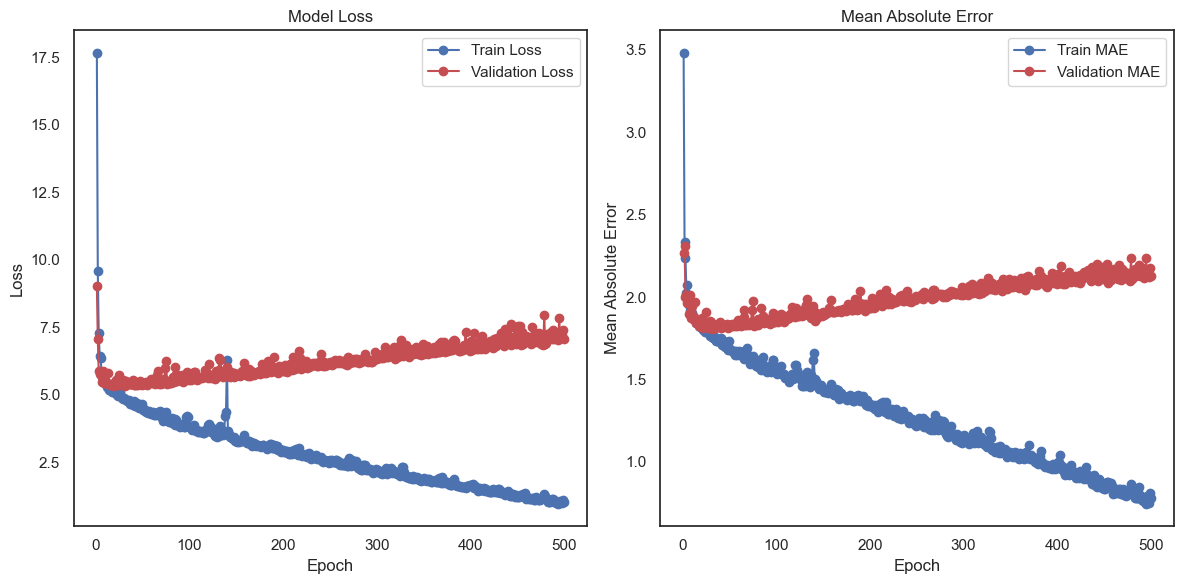

In [26]:
import matplotlib.pyplot as plt
history = AnxietyHistory.history

epochs = range(1, len(history['loss']) + 1)  # Number of epochs

plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history['loss'], 'bo-', label='Train Loss')
plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot mean absolute error
plt.subplot(1, 2, 2)
plt.plot(epochs, history['mean_absolute_error'], 'bo-', label='Train MAE')
plt.plot(epochs, history['val_mean_absolute_error'], 'ro-', label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()


In [27]:
InsomniaModel, InsomniaHistory = trainCNNModel(Insomnia_X_train, Insomnia_Y_train)

Epoch 1/500
15/15 [==============================] - 2s 38ms/step - loss: 20.6863 - mean_absolute_error: 3.5423 - mean_squared_error: 20.6863 - val_loss: 13.8296 - val_mean_absolute_error: 2.8116 - val_mean_squared_error: 13.8296
Epoch 2/500
15/15 [==============================] - 0s 12ms/step - loss: 12.6638 - mean_absolute_error: 2.8400 - mean_squared_error: 12.6638 - val_loss: 9.9890 - val_mean_absolute_error: 2.6351 - val_mean_squared_error: 9.9890
Epoch 3/500
15/15 [==============================] - 0s 12ms/step - loss: 9.9152 - mean_absolute_error: 2.6739 - mean_squared_error: 9.9152 - val_loss: 9.7645 - val_mean_absolute_error: 2.6000 - val_mean_squared_error: 9.7645
Epoch 4/500
15/15 [==============================] - 0s 12ms/step - loss: 9.4514 - mean_absolute_error: 2.5609 - mean_squared_error: 9.4514 - val_loss: 9.1864 - val_mean_absolute_error: 2.4994 - val_mean_squared_error: 9.1864
Epoch 5/500
15/15 [==============================] - 0s 13ms/step - loss: 9.1539 - mean_ab

15/15 [==============================] - 0s 11ms/step - loss: 7.5635 - mean_absolute_error: 2.2838 - mean_squared_error: 7.5635 - val_loss: 7.9561 - val_mean_absolute_error: 2.3361 - val_mean_squared_error: 7.9561
Epoch 38/500
15/15 [==============================] - 0s 12ms/step - loss: 7.6655 - mean_absolute_error: 2.2695 - mean_squared_error: 7.6655 - val_loss: 8.2933 - val_mean_absolute_error: 2.4137 - val_mean_squared_error: 8.2933
Epoch 39/500
15/15 [==============================] - 0s 14ms/step - loss: 7.5963 - mean_absolute_error: 2.2932 - mean_squared_error: 7.5963 - val_loss: 8.0624 - val_mean_absolute_error: 2.3786 - val_mean_squared_error: 8.0624
Epoch 40/500
15/15 [==============================] - 0s 12ms/step - loss: 7.6560 - mean_absolute_error: 2.2922 - mean_squared_error: 7.6560 - val_loss: 8.0150 - val_mean_absolute_error: 2.3404 - val_mean_squared_error: 8.0150
Epoch 41/500
15/15 [==============================] - 0s 13ms/step - loss: 7.4887 - mean_absolute_error: 

15/15 [==============================] - 0s 10ms/step - loss: 7.0556 - mean_absolute_error: 2.1859 - mean_squared_error: 7.0556 - val_loss: 8.3368 - val_mean_absolute_error: 2.4113 - val_mean_squared_error: 8.3368
Epoch 74/500
15/15 [==============================] - 0s 11ms/step - loss: 7.0548 - mean_absolute_error: 2.1888 - mean_squared_error: 7.0548 - val_loss: 8.1096 - val_mean_absolute_error: 2.3602 - val_mean_squared_error: 8.1096
Epoch 75/500
15/15 [==============================] - 0s 18ms/step - loss: 7.0405 - mean_absolute_error: 2.1938 - mean_squared_error: 7.0405 - val_loss: 8.5523 - val_mean_absolute_error: 2.4379 - val_mean_squared_error: 8.5523
Epoch 76/500
15/15 [==============================] - 0s 18ms/step - loss: 7.0429 - mean_absolute_error: 2.1944 - mean_squared_error: 7.0429 - val_loss: 8.0976 - val_mean_absolute_error: 2.3626 - val_mean_squared_error: 8.0976
Epoch 77/500
15/15 [==============================] - 0s 19ms/step - loss: 7.0247 - mean_absolute_error: 

15/15 [==============================] - 0s 16ms/step - loss: 6.6477 - mean_absolute_error: 2.1289 - mean_squared_error: 6.6477 - val_loss: 8.2394 - val_mean_absolute_error: 2.3681 - val_mean_squared_error: 8.2394
Epoch 110/500
15/15 [==============================] - 0s 11ms/step - loss: 6.6113 - mean_absolute_error: 2.1131 - mean_squared_error: 6.6113 - val_loss: 8.5380 - val_mean_absolute_error: 2.4168 - val_mean_squared_error: 8.5380
Epoch 111/500
15/15 [==============================] - 0s 11ms/step - loss: 6.6030 - mean_absolute_error: 2.1271 - mean_squared_error: 6.6030 - val_loss: 8.1878 - val_mean_absolute_error: 2.3751 - val_mean_squared_error: 8.1878
Epoch 112/500
15/15 [==============================] - 0s 15ms/step - loss: 6.5411 - mean_absolute_error: 2.0960 - mean_squared_error: 6.5411 - val_loss: 8.7706 - val_mean_absolute_error: 2.4483 - val_mean_squared_error: 8.7706
Epoch 113/500
15/15 [==============================] - 0s 19ms/step - loss: 6.7727 - mean_absolute_err

Epoch 145/500
15/15 [==============================] - 0s 18ms/step - loss: 6.2892 - mean_absolute_error: 2.0682 - mean_squared_error: 6.2892 - val_loss: 8.5629 - val_mean_absolute_error: 2.4329 - val_mean_squared_error: 8.5629
Epoch 146/500
15/15 [==============================] - 0s 11ms/step - loss: 6.1414 - mean_absolute_error: 2.0386 - mean_squared_error: 6.1414 - val_loss: 8.5781 - val_mean_absolute_error: 2.4030 - val_mean_squared_error: 8.5781
Epoch 147/500
15/15 [==============================] - 0s 10ms/step - loss: 6.1550 - mean_absolute_error: 2.0294 - mean_squared_error: 6.1550 - val_loss: 8.6489 - val_mean_absolute_error: 2.4319 - val_mean_squared_error: 8.6489
Epoch 148/500
15/15 [==============================] - 0s 11ms/step - loss: 6.1487 - mean_absolute_error: 2.0476 - mean_squared_error: 6.1487 - val_loss: 8.7732 - val_mean_absolute_error: 2.4414 - val_mean_squared_error: 8.7732
Epoch 149/500
15/15 [==============================] - 0s 12ms/step - loss: 6.1900 - mea

Epoch 181/500
15/15 [==============================] - 0s 11ms/step - loss: 5.7978 - mean_absolute_error: 1.9875 - mean_squared_error: 5.7978 - val_loss: 8.8460 - val_mean_absolute_error: 2.4395 - val_mean_squared_error: 8.8460
Epoch 182/500
15/15 [==============================] - 0s 11ms/step - loss: 5.8070 - mean_absolute_error: 1.9712 - mean_squared_error: 5.8070 - val_loss: 9.1770 - val_mean_absolute_error: 2.4707 - val_mean_squared_error: 9.1770
Epoch 183/500
15/15 [==============================] - 0s 12ms/step - loss: 5.8140 - mean_absolute_error: 1.9719 - mean_squared_error: 5.8140 - val_loss: 8.9552 - val_mean_absolute_error: 2.4617 - val_mean_squared_error: 8.9552
Epoch 184/500
15/15 [==============================] - 0s 11ms/step - loss: 5.8593 - mean_absolute_error: 1.9852 - mean_squared_error: 5.8593 - val_loss: 9.0574 - val_mean_absolute_error: 2.4455 - val_mean_squared_error: 9.0574
Epoch 185/500
15/15 [==============================] - 0s 12ms/step - loss: 5.6852 - mea

Epoch 217/500
15/15 [==============================] - 0s 11ms/step - loss: 5.4397 - mean_absolute_error: 1.8889 - mean_squared_error: 5.4397 - val_loss: 9.6239 - val_mean_absolute_error: 2.5423 - val_mean_squared_error: 9.6239
Epoch 218/500
15/15 [==============================] - 0s 11ms/step - loss: 5.5085 - mean_absolute_error: 1.9101 - mean_squared_error: 5.5085 - val_loss: 9.2830 - val_mean_absolute_error: 2.4854 - val_mean_squared_error: 9.2830
Epoch 219/500
15/15 [==============================] - 0s 11ms/step - loss: 5.6262 - mean_absolute_error: 1.9644 - mean_squared_error: 5.6262 - val_loss: 9.6184 - val_mean_absolute_error: 2.5047 - val_mean_squared_error: 9.6184
Epoch 220/500
15/15 [==============================] - 0s 11ms/step - loss: 5.4254 - mean_absolute_error: 1.8926 - mean_squared_error: 5.4254 - val_loss: 9.5251 - val_mean_absolute_error: 2.5254 - val_mean_squared_error: 9.5251
Epoch 221/500
15/15 [==============================] - 0s 10ms/step - loss: 5.3676 - mea

Epoch 253/500
15/15 [==============================] - 0s 11ms/step - loss: 4.9733 - mean_absolute_error: 1.8175 - mean_squared_error: 4.9733 - val_loss: 10.1493 - val_mean_absolute_error: 2.5834 - val_mean_squared_error: 10.1493
Epoch 254/500
15/15 [==============================] - 0s 11ms/step - loss: 4.9925 - mean_absolute_error: 1.8097 - mean_squared_error: 4.9925 - val_loss: 9.8742 - val_mean_absolute_error: 2.5387 - val_mean_squared_error: 9.8742
Epoch 255/500
15/15 [==============================] - 0s 11ms/step - loss: 5.3195 - mean_absolute_error: 1.8761 - mean_squared_error: 5.3195 - val_loss: 10.0205 - val_mean_absolute_error: 2.5407 - val_mean_squared_error: 10.0205
Epoch 256/500
15/15 [==============================] - 0s 11ms/step - loss: 5.0953 - mean_absolute_error: 1.8414 - mean_squared_error: 5.0953 - val_loss: 9.7538 - val_mean_absolute_error: 2.5369 - val_mean_squared_error: 9.7538
Epoch 257/500
15/15 [==============================] - 0s 10ms/step - loss: 5.1922 -

Epoch 289/500
15/15 [==============================] - 0s 11ms/step - loss: 4.7267 - mean_absolute_error: 1.7514 - mean_squared_error: 4.7267 - val_loss: 10.3582 - val_mean_absolute_error: 2.5863 - val_mean_squared_error: 10.3582
Epoch 290/500
15/15 [==============================] - 0s 10ms/step - loss: 4.6383 - mean_absolute_error: 1.7376 - mean_squared_error: 4.6383 - val_loss: 10.5502 - val_mean_absolute_error: 2.6327 - val_mean_squared_error: 10.5502
Epoch 291/500
15/15 [==============================] - 0s 11ms/step - loss: 4.6643 - mean_absolute_error: 1.7465 - mean_squared_error: 4.6643 - val_loss: 10.2810 - val_mean_absolute_error: 2.5874 - val_mean_squared_error: 10.2810
Epoch 292/500
15/15 [==============================] - 0s 11ms/step - loss: 4.6929 - mean_absolute_error: 1.7479 - mean_squared_error: 4.6929 - val_loss: 10.4228 - val_mean_absolute_error: 2.6048 - val_mean_squared_error: 10.4228
Epoch 293/500
15/15 [==============================] - 0s 11ms/step - loss: 4.65

Epoch 325/500
15/15 [==============================] - 0s 12ms/step - loss: 4.4875 - mean_absolute_error: 1.7116 - mean_squared_error: 4.4875 - val_loss: 10.6791 - val_mean_absolute_error: 2.6305 - val_mean_squared_error: 10.6791
Epoch 326/500
15/15 [==============================] - 0s 18ms/step - loss: 4.4463 - mean_absolute_error: 1.6924 - mean_squared_error: 4.4463 - val_loss: 10.7681 - val_mean_absolute_error: 2.6385 - val_mean_squared_error: 10.7681
Epoch 327/500
15/15 [==============================] - 0s 12ms/step - loss: 4.5832 - mean_absolute_error: 1.7149 - mean_squared_error: 4.5832 - val_loss: 10.6983 - val_mean_absolute_error: 2.6310 - val_mean_squared_error: 10.6983
Epoch 328/500
15/15 [==============================] - 0s 11ms/step - loss: 4.4764 - mean_absolute_error: 1.7042 - mean_squared_error: 4.4764 - val_loss: 10.8385 - val_mean_absolute_error: 2.6548 - val_mean_squared_error: 10.8385
Epoch 329/500
15/15 [==============================] - 0s 10ms/step - loss: 4.38

Epoch 361/500
15/15 [==============================] - 0s 18ms/step - loss: 4.1731 - mean_absolute_error: 1.6268 - mean_squared_error: 4.1731 - val_loss: 12.5870 - val_mean_absolute_error: 2.8875 - val_mean_squared_error: 12.5870
Epoch 362/500
15/15 [==============================] - 0s 17ms/step - loss: 4.5820 - mean_absolute_error: 1.7075 - mean_squared_error: 4.5820 - val_loss: 12.3041 - val_mean_absolute_error: 2.8520 - val_mean_squared_error: 12.3041
Epoch 363/500
15/15 [==============================] - 0s 11ms/step - loss: 4.2580 - mean_absolute_error: 1.6534 - mean_squared_error: 4.2580 - val_loss: 11.1224 - val_mean_absolute_error: 2.6870 - val_mean_squared_error: 11.1224
Epoch 364/500
15/15 [==============================] - 0s 11ms/step - loss: 4.1544 - mean_absolute_error: 1.6212 - mean_squared_error: 4.1544 - val_loss: 11.6798 - val_mean_absolute_error: 2.7904 - val_mean_squared_error: 11.6798
Epoch 365/500
15/15 [==============================] - 0s 11ms/step - loss: 4.22

Epoch 397/500
15/15 [==============================] - 0s 23ms/step - loss: 3.9434 - mean_absolute_error: 1.5980 - mean_squared_error: 3.9434 - val_loss: 11.5135 - val_mean_absolute_error: 2.6944 - val_mean_squared_error: 11.5135
Epoch 398/500
15/15 [==============================] - 0s 19ms/step - loss: 3.9647 - mean_absolute_error: 1.5924 - mean_squared_error: 3.9647 - val_loss: 11.6427 - val_mean_absolute_error: 2.7645 - val_mean_squared_error: 11.6427
Epoch 399/500
15/15 [==============================] - 0s 17ms/step - loss: 4.0204 - mean_absolute_error: 1.5910 - mean_squared_error: 4.0204 - val_loss: 12.2969 - val_mean_absolute_error: 2.8547 - val_mean_squared_error: 12.2969
Epoch 400/500
15/15 [==============================] - 0s 11ms/step - loss: 4.1448 - mean_absolute_error: 1.6342 - mean_squared_error: 4.1448 - val_loss: 11.7229 - val_mean_absolute_error: 2.7716 - val_mean_squared_error: 11.7229
Epoch 401/500
15/15 [==============================] - 0s 11ms/step - loss: 3.91

Epoch 433/500
15/15 [==============================] - 0s 12ms/step - loss: 3.8987 - mean_absolute_error: 1.5769 - mean_squared_error: 3.8987 - val_loss: 12.0681 - val_mean_absolute_error: 2.8045 - val_mean_squared_error: 12.0681
Epoch 434/500
15/15 [==============================] - 0s 11ms/step - loss: 3.9239 - mean_absolute_error: 1.5750 - mean_squared_error: 3.9239 - val_loss: 11.8997 - val_mean_absolute_error: 2.7674 - val_mean_squared_error: 11.8997
Epoch 435/500
15/15 [==============================] - 0s 11ms/step - loss: 3.8418 - mean_absolute_error: 1.5523 - mean_squared_error: 3.8418 - val_loss: 11.6985 - val_mean_absolute_error: 2.7114 - val_mean_squared_error: 11.6985
Epoch 436/500
15/15 [==============================] - 0s 11ms/step - loss: 3.7583 - mean_absolute_error: 1.5580 - mean_squared_error: 3.7583 - val_loss: 11.9190 - val_mean_absolute_error: 2.7801 - val_mean_squared_error: 11.9190
Epoch 437/500
15/15 [==============================] - 0s 10ms/step - loss: 3.75

Epoch 469/500
15/15 [==============================] - 0s 13ms/step - loss: 3.5202 - mean_absolute_error: 1.4908 - mean_squared_error: 3.5202 - val_loss: 12.1195 - val_mean_absolute_error: 2.7752 - val_mean_squared_error: 12.1195
Epoch 470/500
15/15 [==============================] - 0s 17ms/step - loss: 3.6183 - mean_absolute_error: 1.5022 - mean_squared_error: 3.6183 - val_loss: 12.1118 - val_mean_absolute_error: 2.7588 - val_mean_squared_error: 12.1118
Epoch 471/500
15/15 [==============================] - 0s 13ms/step - loss: 3.5740 - mean_absolute_error: 1.4839 - mean_squared_error: 3.5740 - val_loss: 12.8837 - val_mean_absolute_error: 2.9114 - val_mean_squared_error: 12.8837
Epoch 472/500
15/15 [==============================] - 0s 10ms/step - loss: 3.6037 - mean_absolute_error: 1.5023 - mean_squared_error: 3.6037 - val_loss: 12.3425 - val_mean_absolute_error: 2.8498 - val_mean_squared_error: 12.3425
Epoch 473/500
15/15 [==============================] - 0s 11ms/step - loss: 3.51

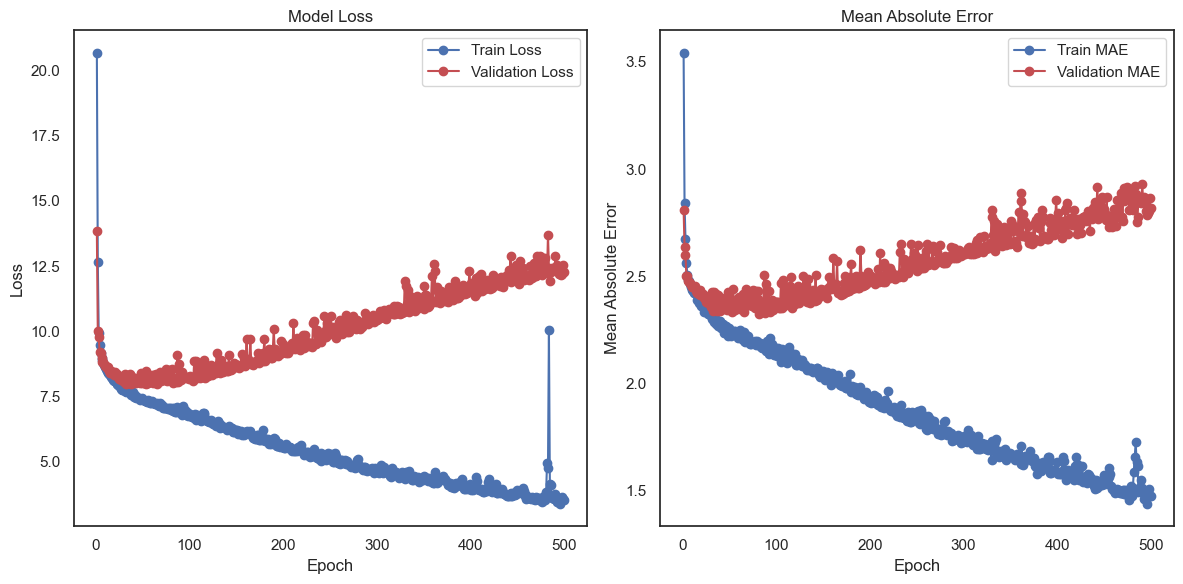

In [28]:
history = InsomniaHistory.history

epochs = range(1, len(history['loss']) + 1)  # Number of epochs

plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history['loss'], 'bo-', label='Train Loss')
plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot mean absolute error
plt.subplot(1, 2, 2)
plt.plot(epochs, history['mean_absolute_error'], 'bo-', label='Train MAE')
plt.plot(epochs, history['val_mean_absolute_error'], 'ro-', label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
DepressionModel, DepressionHistory = trainCNNModel(Depression_X_train, Depression_Y_train)

Epoch 1/500
15/15 [==============================] - 3s 47ms/step - loss: 25.7787 - mean_absolute_error: 4.2699 - mean_squared_error: 25.7787 - val_loss: 16.2426 - val_mean_absolute_error: 3.4112 - val_mean_squared_error: 16.2426
Epoch 2/500
15/15 [==============================] - 0s 14ms/step - loss: 14.5661 - mean_absolute_error: 3.2127 - mean_squared_error: 14.5661 - val_loss: 8.9087 - val_mean_absolute_error: 2.4701 - val_mean_squared_error: 8.9087
Epoch 3/500
15/15 [==============================] - 0s 18ms/step - loss: 10.2620 - mean_absolute_error: 2.6855 - mean_squared_error: 10.2620 - val_loss: 8.0801 - val_mean_absolute_error: 2.2326 - val_mean_squared_error: 8.0801
Epoch 4/500
15/15 [==============================] - 0s 13ms/step - loss: 8.8372 - mean_absolute_error: 2.4316 - mean_squared_error: 8.8372 - val_loss: 7.5373 - val_mean_absolute_error: 2.1381 - val_mean_squared_error: 7.5373
Epoch 5/500
15/15 [==============================] - 0s 23ms/step - loss: 8.1907 - mean_

15/15 [==============================] - 0s 14ms/step - loss: 5.6986 - mean_absolute_error: 1.8990 - mean_squared_error: 5.6986 - val_loss: 5.8509 - val_mean_absolute_error: 1.9217 - val_mean_squared_error: 5.8509
Epoch 38/500
15/15 [==============================] - 0s 12ms/step - loss: 5.6440 - mean_absolute_error: 1.8998 - mean_squared_error: 5.6440 - val_loss: 5.8498 - val_mean_absolute_error: 1.9256 - val_mean_squared_error: 5.8498
Epoch 39/500
15/15 [==============================] - 0s 11ms/step - loss: 5.7006 - mean_absolute_error: 1.9004 - mean_squared_error: 5.7006 - val_loss: 5.8479 - val_mean_absolute_error: 1.9200 - val_mean_squared_error: 5.8479
Epoch 40/500
15/15 [==============================] - 0s 11ms/step - loss: 5.5846 - mean_absolute_error: 1.8929 - mean_squared_error: 5.5846 - val_loss: 5.8656 - val_mean_absolute_error: 1.9125 - val_mean_squared_error: 5.8656
Epoch 41/500
15/15 [==============================] - 0s 12ms/step - loss: 5.5322 - mean_absolute_error: 

15/15 [==============================] - 0s 10ms/step - loss: 5.2390 - mean_absolute_error: 1.8376 - mean_squared_error: 5.2390 - val_loss: 6.0767 - val_mean_absolute_error: 1.9612 - val_mean_squared_error: 6.0767
Epoch 74/500
15/15 [==============================] - 0s 11ms/step - loss: 5.3998 - mean_absolute_error: 1.8197 - mean_squared_error: 5.3998 - val_loss: 6.3668 - val_mean_absolute_error: 1.9915 - val_mean_squared_error: 6.3668
Epoch 75/500
15/15 [==============================] - 0s 11ms/step - loss: 5.2601 - mean_absolute_error: 1.8347 - mean_squared_error: 5.2601 - val_loss: 5.8398 - val_mean_absolute_error: 1.9574 - val_mean_squared_error: 5.8398
Epoch 76/500
15/15 [==============================] - 0s 11ms/step - loss: 5.2711 - mean_absolute_error: 1.8264 - mean_squared_error: 5.2711 - val_loss: 5.8701 - val_mean_absolute_error: 1.9546 - val_mean_squared_error: 5.8701
Epoch 77/500
15/15 [==============================] - 0s 12ms/step - loss: 5.3565 - mean_absolute_error: 

15/15 [==============================] - 0s 22ms/step - loss: 5.3075 - mean_absolute_error: 1.8639 - mean_squared_error: 5.3075 - val_loss: 6.4143 - val_mean_absolute_error: 2.0269 - val_mean_squared_error: 6.4143
Epoch 110/500
15/15 [==============================] - 0s 14ms/step - loss: 5.1501 - mean_absolute_error: 1.7826 - mean_squared_error: 5.1501 - val_loss: 6.1433 - val_mean_absolute_error: 1.9732 - val_mean_squared_error: 6.1433
Epoch 111/500
15/15 [==============================] - 0s 15ms/step - loss: 4.9766 - mean_absolute_error: 1.7639 - mean_squared_error: 4.9766 - val_loss: 6.2356 - val_mean_absolute_error: 1.9854 - val_mean_squared_error: 6.2356
Epoch 112/500
15/15 [==============================] - 0s 19ms/step - loss: 4.8568 - mean_absolute_error: 1.7618 - mean_squared_error: 4.8568 - val_loss: 6.1521 - val_mean_absolute_error: 1.9859 - val_mean_squared_error: 6.1521
Epoch 113/500
15/15 [==============================] - 0s 14ms/step - loss: 4.9308 - mean_absolute_err

Epoch 145/500
15/15 [==============================] - 0s 13ms/step - loss: 4.6635 - mean_absolute_error: 1.7047 - mean_squared_error: 4.6635 - val_loss: 6.2471 - val_mean_absolute_error: 1.9847 - val_mean_squared_error: 6.2471
Epoch 146/500
15/15 [==============================] - 0s 12ms/step - loss: 4.6301 - mean_absolute_error: 1.7225 - mean_squared_error: 4.6301 - val_loss: 6.3093 - val_mean_absolute_error: 1.9930 - val_mean_squared_error: 6.3093
Epoch 147/500
15/15 [==============================] - 0s 11ms/step - loss: 4.6524 - mean_absolute_error: 1.6958 - mean_squared_error: 4.6524 - val_loss: 6.3899 - val_mean_absolute_error: 2.0061 - val_mean_squared_error: 6.3899
Epoch 148/500
15/15 [==============================] - 0s 11ms/step - loss: 4.7382 - mean_absolute_error: 1.7568 - mean_squared_error: 4.7382 - val_loss: 6.2197 - val_mean_absolute_error: 1.9827 - val_mean_squared_error: 6.2197
Epoch 149/500
15/15 [==============================] - 0s 14ms/step - loss: 4.6183 - mea

Epoch 181/500
15/15 [==============================] - 0s 11ms/step - loss: 4.3962 - mean_absolute_error: 1.6775 - mean_squared_error: 4.3962 - val_loss: 6.5720 - val_mean_absolute_error: 1.9926 - val_mean_squared_error: 6.5720
Epoch 182/500
15/15 [==============================] - 0s 10ms/step - loss: 4.5637 - mean_absolute_error: 1.6979 - mean_squared_error: 4.5637 - val_loss: 6.4518 - val_mean_absolute_error: 1.9863 - val_mean_squared_error: 6.4518
Epoch 183/500
15/15 [==============================] - 0s 11ms/step - loss: 4.4951 - mean_absolute_error: 1.6890 - mean_squared_error: 4.4951 - val_loss: 6.4992 - val_mean_absolute_error: 2.0039 - val_mean_squared_error: 6.4992
Epoch 184/500
15/15 [==============================] - 0s 10ms/step - loss: 4.3991 - mean_absolute_error: 1.6753 - mean_squared_error: 4.3991 - val_loss: 6.5707 - val_mean_absolute_error: 1.9994 - val_mean_squared_error: 6.5707
Epoch 185/500
15/15 [==============================] - 0s 11ms/step - loss: 4.4936 - mea

Epoch 217/500
15/15 [==============================] - 0s 10ms/step - loss: 4.3018 - mean_absolute_error: 1.6578 - mean_squared_error: 4.3018 - val_loss: 6.5267 - val_mean_absolute_error: 1.9805 - val_mean_squared_error: 6.5267
Epoch 218/500
15/15 [==============================] - 0s 11ms/step - loss: 4.2796 - mean_absolute_error: 1.6422 - mean_squared_error: 4.2796 - val_loss: 6.7864 - val_mean_absolute_error: 2.0306 - val_mean_squared_error: 6.7864
Epoch 219/500
15/15 [==============================] - 0s 10ms/step - loss: 4.4381 - mean_absolute_error: 1.6633 - mean_squared_error: 4.4381 - val_loss: 6.5877 - val_mean_absolute_error: 1.9896 - val_mean_squared_error: 6.5877
Epoch 220/500
15/15 [==============================] - 0s 11ms/step - loss: 4.2223 - mean_absolute_error: 1.6229 - mean_squared_error: 4.2223 - val_loss: 6.5281 - val_mean_absolute_error: 1.9834 - val_mean_squared_error: 6.5281
Epoch 221/500
15/15 [==============================] - 0s 11ms/step - loss: 4.2492 - mea

Epoch 253/500
15/15 [==============================] - 0s 14ms/step - loss: 4.0809 - mean_absolute_error: 1.6096 - mean_squared_error: 4.0809 - val_loss: 6.5367 - val_mean_absolute_error: 1.9884 - val_mean_squared_error: 6.5367
Epoch 254/500
15/15 [==============================] - 0s 14ms/step - loss: 4.0532 - mean_absolute_error: 1.5906 - mean_squared_error: 4.0532 - val_loss: 6.6514 - val_mean_absolute_error: 1.9864 - val_mean_squared_error: 6.6514
Epoch 255/500
15/15 [==============================] - 0s 10ms/step - loss: 4.0504 - mean_absolute_error: 1.6093 - mean_squared_error: 4.0504 - val_loss: 6.6590 - val_mean_absolute_error: 1.9934 - val_mean_squared_error: 6.6590
Epoch 256/500
15/15 [==============================] - 0s 12ms/step - loss: 4.0825 - mean_absolute_error: 1.6054 - mean_squared_error: 4.0825 - val_loss: 6.6462 - val_mean_absolute_error: 1.9845 - val_mean_squared_error: 6.6462
Epoch 257/500
15/15 [==============================] - 0s 11ms/step - loss: 4.0719 - mea

Epoch 289/500
15/15 [==============================] - 0s 12ms/step - loss: 3.9475 - mean_absolute_error: 1.5727 - mean_squared_error: 3.9475 - val_loss: 6.7426 - val_mean_absolute_error: 1.9928 - val_mean_squared_error: 6.7426
Epoch 290/500
15/15 [==============================] - 0s 11ms/step - loss: 3.9903 - mean_absolute_error: 1.6174 - mean_squared_error: 3.9903 - val_loss: 6.7472 - val_mean_absolute_error: 1.9979 - val_mean_squared_error: 6.7472
Epoch 291/500
15/15 [==============================] - 0s 12ms/step - loss: 3.9668 - mean_absolute_error: 1.5916 - mean_squared_error: 3.9668 - val_loss: 6.7706 - val_mean_absolute_error: 1.9871 - val_mean_squared_error: 6.7706
Epoch 292/500
15/15 [==============================] - 0s 19ms/step - loss: 3.9204 - mean_absolute_error: 1.5675 - mean_squared_error: 3.9204 - val_loss: 6.6683 - val_mean_absolute_error: 1.9982 - val_mean_squared_error: 6.6683
Epoch 293/500
15/15 [==============================] - 0s 13ms/step - loss: 3.9965 - mea

Epoch 325/500
15/15 [==============================] - 0s 12ms/step - loss: 3.8511 - mean_absolute_error: 1.5416 - mean_squared_error: 3.8511 - val_loss: 6.8565 - val_mean_absolute_error: 2.0175 - val_mean_squared_error: 6.8565
Epoch 326/500
15/15 [==============================] - 0s 18ms/step - loss: 3.7892 - mean_absolute_error: 1.5593 - mean_squared_error: 3.7892 - val_loss: 6.8906 - val_mean_absolute_error: 2.0012 - val_mean_squared_error: 6.8906
Epoch 327/500
15/15 [==============================] - 0s 18ms/step - loss: 3.7696 - mean_absolute_error: 1.5221 - mean_squared_error: 3.7696 - val_loss: 6.8319 - val_mean_absolute_error: 2.0157 - val_mean_squared_error: 6.8319
Epoch 328/500
15/15 [==============================] - 0s 12ms/step - loss: 3.9958 - mean_absolute_error: 1.6082 - mean_squared_error: 3.9958 - val_loss: 7.0085 - val_mean_absolute_error: 2.0160 - val_mean_squared_error: 7.0085
Epoch 329/500
15/15 [==============================] - 0s 12ms/step - loss: 3.7941 - mea

Epoch 361/500
15/15 [==============================] - 0s 12ms/step - loss: 3.6984 - mean_absolute_error: 1.5125 - mean_squared_error: 3.6984 - val_loss: 6.8611 - val_mean_absolute_error: 2.0127 - val_mean_squared_error: 6.8611
Epoch 362/500
15/15 [==============================] - 0s 11ms/step - loss: 3.6768 - mean_absolute_error: 1.5217 - mean_squared_error: 3.6768 - val_loss: 7.0578 - val_mean_absolute_error: 2.0370 - val_mean_squared_error: 7.0578
Epoch 363/500
15/15 [==============================] - 0s 11ms/step - loss: 3.7602 - mean_absolute_error: 1.5425 - mean_squared_error: 3.7602 - val_loss: 7.0689 - val_mean_absolute_error: 2.0226 - val_mean_squared_error: 7.0689
Epoch 364/500
15/15 [==============================] - 0s 11ms/step - loss: 3.8145 - mean_absolute_error: 1.5483 - mean_squared_error: 3.8145 - val_loss: 6.9029 - val_mean_absolute_error: 2.0251 - val_mean_squared_error: 6.9029
Epoch 365/500
15/15 [==============================] - 0s 10ms/step - loss: 3.7698 - mea

Epoch 397/500
15/15 [==============================] - 0s 17ms/step - loss: 3.5858 - mean_absolute_error: 1.4851 - mean_squared_error: 3.5858 - val_loss: 6.9684 - val_mean_absolute_error: 2.0295 - val_mean_squared_error: 6.9684
Epoch 398/500
15/15 [==============================] - 0s 16ms/step - loss: 3.5654 - mean_absolute_error: 1.4983 - mean_squared_error: 3.5654 - val_loss: 7.1503 - val_mean_absolute_error: 2.0579 - val_mean_squared_error: 7.1503
Epoch 399/500
15/15 [==============================] - 0s 15ms/step - loss: 3.6609 - mean_absolute_error: 1.5345 - mean_squared_error: 3.6609 - val_loss: 7.0632 - val_mean_absolute_error: 2.0453 - val_mean_squared_error: 7.0632
Epoch 400/500
15/15 [==============================] - 0s 17ms/step - loss: 3.5772 - mean_absolute_error: 1.4913 - mean_squared_error: 3.5772 - val_loss: 7.0739 - val_mean_absolute_error: 2.0433 - val_mean_squared_error: 7.0739
Epoch 401/500
15/15 [==============================] - 0s 14ms/step - loss: 3.5248 - mea

Epoch 433/500
15/15 [==============================] - 0s 12ms/step - loss: 3.4859 - mean_absolute_error: 1.4616 - mean_squared_error: 3.4859 - val_loss: 7.5319 - val_mean_absolute_error: 2.1635 - val_mean_squared_error: 7.5319
Epoch 434/500
15/15 [==============================] - 0s 16ms/step - loss: 3.6596 - mean_absolute_error: 1.5111 - mean_squared_error: 3.6596 - val_loss: 7.4539 - val_mean_absolute_error: 2.0982 - val_mean_squared_error: 7.4539
Epoch 435/500
15/15 [==============================] - 0s 15ms/step - loss: 3.4466 - mean_absolute_error: 1.4678 - mean_squared_error: 3.4466 - val_loss: 7.0998 - val_mean_absolute_error: 2.0690 - val_mean_squared_error: 7.0998
Epoch 436/500
15/15 [==============================] - 0s 11ms/step - loss: 3.5531 - mean_absolute_error: 1.4985 - mean_squared_error: 3.5531 - val_loss: 7.3690 - val_mean_absolute_error: 2.1112 - val_mean_squared_error: 7.3690
Epoch 437/500
15/15 [==============================] - 0s 11ms/step - loss: 3.5768 - mea

Epoch 469/500
15/15 [==============================] - 0s 13ms/step - loss: 3.3756 - mean_absolute_error: 1.4338 - mean_squared_error: 3.3756 - val_loss: 7.1588 - val_mean_absolute_error: 2.0816 - val_mean_squared_error: 7.1588
Epoch 470/500
15/15 [==============================] - 0s 12ms/step - loss: 3.3324 - mean_absolute_error: 1.4329 - mean_squared_error: 3.3324 - val_loss: 7.3293 - val_mean_absolute_error: 2.0857 - val_mean_squared_error: 7.3293
Epoch 471/500
15/15 [==============================] - 0s 12ms/step - loss: 3.3748 - mean_absolute_error: 1.4565 - mean_squared_error: 3.3748 - val_loss: 7.4220 - val_mean_absolute_error: 2.1039 - val_mean_squared_error: 7.4220
Epoch 472/500
15/15 [==============================] - 0s 11ms/step - loss: 3.3641 - mean_absolute_error: 1.4343 - mean_squared_error: 3.3641 - val_loss: 7.3469 - val_mean_absolute_error: 2.1154 - val_mean_squared_error: 7.3469
Epoch 473/500
15/15 [==============================] - 0s 11ms/step - loss: 3.2839 - mea

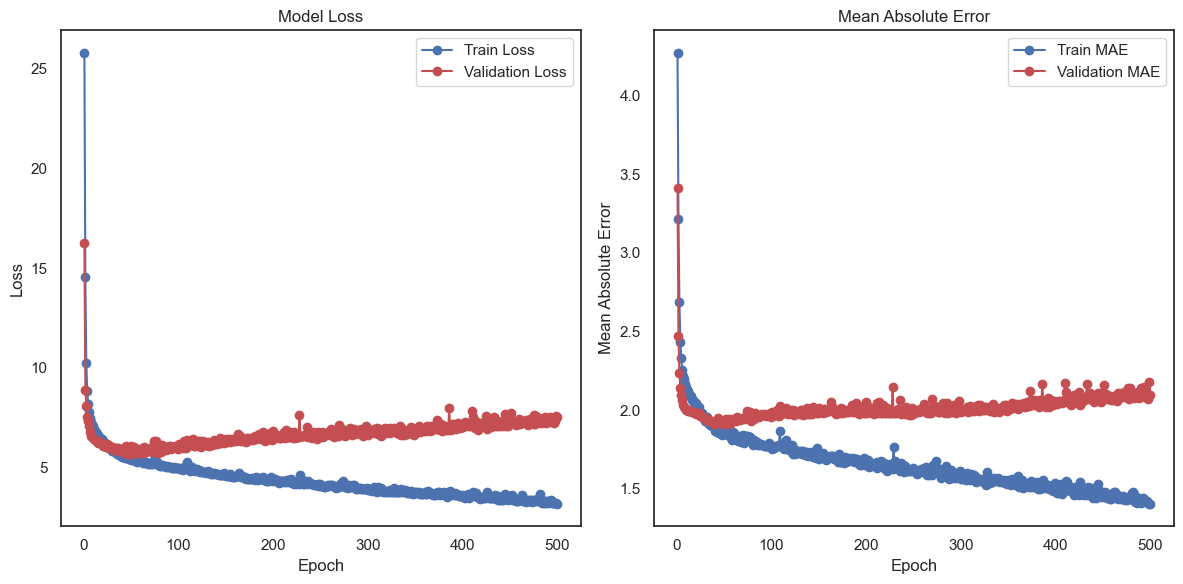

In [30]:
history = DepressionHistory.history

epochs = range(1, len(history['loss']) + 1)  # Number of epochs

plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history['loss'], 'bo-', label='Train Loss')
plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot mean absolute error
plt.subplot(1, 2, 2)
plt.plot(epochs, history['mean_absolute_error'], 'bo-', label='Train MAE')
plt.plot(epochs, history['val_mean_absolute_error'], 'ro-', label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
OCDModel, OCDHistory = trainCNNModel(OCD_X_train, OCD_Y_train)

Epoch 1/500
15/15 [==============================] - 2s 35ms/step - loss: 11.9058 - mean_absolute_error: 2.4694 - mean_squared_error: 11.9058 - val_loss: 11.0080 - val_mean_absolute_error: 2.5597 - val_mean_squared_error: 11.0080
Epoch 2/500
15/15 [==============================] - 0s 11ms/step - loss: 8.5522 - mean_absolute_error: 2.3417 - mean_squared_error: 8.5522 - val_loss: 8.8310 - val_mean_absolute_error: 2.3712 - val_mean_squared_error: 8.8310
Epoch 3/500
15/15 [==============================] - 0s 11ms/step - loss: 7.5148 - mean_absolute_error: 2.1733 - mean_squared_error: 7.5148 - val_loss: 8.6354 - val_mean_absolute_error: 2.2747 - val_mean_squared_error: 8.6354
Epoch 4/500
15/15 [==============================] - 0s 11ms/step - loss: 7.2714 - mean_absolute_error: 2.1462 - mean_squared_error: 7.2714 - val_loss: 8.2601 - val_mean_absolute_error: 2.2417 - val_mean_squared_error: 8.2601
Epoch 5/500
15/15 [==============================] - 0s 10ms/step - loss: 7.0915 - mean_abso

15/15 [==============================] - 0s 12ms/step - loss: 6.5327 - mean_absolute_error: 2.0281 - mean_squared_error: 6.5327 - val_loss: 8.0496 - val_mean_absolute_error: 2.2237 - val_mean_squared_error: 8.0496
Epoch 38/500
15/15 [==============================] - 0s 11ms/step - loss: 6.4751 - mean_absolute_error: 2.0535 - mean_squared_error: 6.4751 - val_loss: 8.1182 - val_mean_absolute_error: 2.2347 - val_mean_squared_error: 8.1182
Epoch 39/500
15/15 [==============================] - 0s 12ms/step - loss: 6.4812 - mean_absolute_error: 2.0511 - mean_squared_error: 6.4812 - val_loss: 7.9455 - val_mean_absolute_error: 2.2238 - val_mean_squared_error: 7.9455
Epoch 40/500
15/15 [==============================] - 0s 11ms/step - loss: 6.4551 - mean_absolute_error: 2.0564 - mean_squared_error: 6.4551 - val_loss: 8.2187 - val_mean_absolute_error: 2.2356 - val_mean_squared_error: 8.2187
Epoch 41/500
15/15 [==============================] - 0s 11ms/step - loss: 6.4729 - mean_absolute_error: 

15/15 [==============================] - 0s 11ms/step - loss: 6.0777 - mean_absolute_error: 1.9431 - mean_squared_error: 6.0777 - val_loss: 8.0080 - val_mean_absolute_error: 2.2927 - val_mean_squared_error: 8.0080
Epoch 74/500
15/15 [==============================] - 0s 11ms/step - loss: 5.8912 - mean_absolute_error: 1.9534 - mean_squared_error: 5.8912 - val_loss: 8.3855 - val_mean_absolute_error: 2.2325 - val_mean_squared_error: 8.3855
Epoch 75/500
15/15 [==============================] - 0s 11ms/step - loss: 5.9742 - mean_absolute_error: 1.9458 - mean_squared_error: 5.9742 - val_loss: 8.0992 - val_mean_absolute_error: 2.2766 - val_mean_squared_error: 8.0992
Epoch 76/500
15/15 [==============================] - 0s 11ms/step - loss: 5.8957 - mean_absolute_error: 1.9202 - mean_squared_error: 5.8957 - val_loss: 8.0932 - val_mean_absolute_error: 2.2903 - val_mean_squared_error: 8.0932
Epoch 77/500
15/15 [==============================] - 0s 11ms/step - loss: 5.8636 - mean_absolute_error: 

15/15 [==============================] - 0s 11ms/step - loss: 5.3464 - mean_absolute_error: 1.8498 - mean_squared_error: 5.3464 - val_loss: 8.5064 - val_mean_absolute_error: 2.2712 - val_mean_squared_error: 8.5064
Epoch 110/500
15/15 [==============================] - 0s 11ms/step - loss: 5.3180 - mean_absolute_error: 1.8230 - mean_squared_error: 5.3180 - val_loss: 8.2632 - val_mean_absolute_error: 2.3545 - val_mean_squared_error: 8.2632
Epoch 111/500
15/15 [==============================] - 0s 11ms/step - loss: 5.3749 - mean_absolute_error: 1.8281 - mean_squared_error: 5.3749 - val_loss: 8.7037 - val_mean_absolute_error: 2.2839 - val_mean_squared_error: 8.7037
Epoch 112/500
15/15 [==============================] - 0s 12ms/step - loss: 5.3881 - mean_absolute_error: 1.8763 - mean_squared_error: 5.3881 - val_loss: 8.6705 - val_mean_absolute_error: 2.2680 - val_mean_squared_error: 8.6705
Epoch 113/500
15/15 [==============================] - 0s 11ms/step - loss: 5.2408 - mean_absolute_err

Epoch 145/500
15/15 [==============================] - 0s 11ms/step - loss: 4.8090 - mean_absolute_error: 1.7217 - mean_squared_error: 4.8090 - val_loss: 9.0960 - val_mean_absolute_error: 2.3271 - val_mean_squared_error: 9.0960
Epoch 146/500
15/15 [==============================] - 0s 10ms/step - loss: 4.8378 - mean_absolute_error: 1.7316 - mean_squared_error: 4.8378 - val_loss: 8.7212 - val_mean_absolute_error: 2.3371 - val_mean_squared_error: 8.7212
Epoch 147/500
15/15 [==============================] - 0s 11ms/step - loss: 4.7264 - mean_absolute_error: 1.7000 - mean_squared_error: 4.7264 - val_loss: 8.7451 - val_mean_absolute_error: 2.3655 - val_mean_squared_error: 8.7451
Epoch 148/500
15/15 [==============================] - 0s 11ms/step - loss: 4.7954 - mean_absolute_error: 1.7351 - mean_squared_error: 4.7954 - val_loss: 8.8698 - val_mean_absolute_error: 2.3452 - val_mean_squared_error: 8.8698
Epoch 149/500
15/15 [==============================] - 0s 10ms/step - loss: 4.7017 - mea

Epoch 181/500
15/15 [==============================] - 0s 11ms/step - loss: 4.4166 - mean_absolute_error: 1.6236 - mean_squared_error: 4.4166 - val_loss: 9.1710 - val_mean_absolute_error: 2.4403 - val_mean_squared_error: 9.1710
Epoch 182/500
15/15 [==============================] - 0s 12ms/step - loss: 4.4267 - mean_absolute_error: 1.6377 - mean_squared_error: 4.4267 - val_loss: 9.1191 - val_mean_absolute_error: 2.3986 - val_mean_squared_error: 9.1191
Epoch 183/500
15/15 [==============================] - 0s 12ms/step - loss: 4.4072 - mean_absolute_error: 1.6513 - mean_squared_error: 4.4072 - val_loss: 9.4391 - val_mean_absolute_error: 2.3645 - val_mean_squared_error: 9.4391
Epoch 184/500
15/15 [==============================] - 0s 12ms/step - loss: 4.3637 - mean_absolute_error: 1.6380 - mean_squared_error: 4.3637 - val_loss: 9.5127 - val_mean_absolute_error: 2.3530 - val_mean_squared_error: 9.5127
Epoch 185/500
15/15 [==============================] - 0s 12ms/step - loss: 4.4615 - mea

Epoch 217/500
15/15 [==============================] - 0s 10ms/step - loss: 4.0463 - mean_absolute_error: 1.5648 - mean_squared_error: 4.0463 - val_loss: 9.5331 - val_mean_absolute_error: 2.4104 - val_mean_squared_error: 9.5331
Epoch 218/500
15/15 [==============================] - 0s 11ms/step - loss: 4.0275 - mean_absolute_error: 1.5615 - mean_squared_error: 4.0275 - val_loss: 9.8666 - val_mean_absolute_error: 2.4178 - val_mean_squared_error: 9.8666
Epoch 219/500
15/15 [==============================] - 0s 11ms/step - loss: 4.0342 - mean_absolute_error: 1.5489 - mean_squared_error: 4.0342 - val_loss: 9.6085 - val_mean_absolute_error: 2.4201 - val_mean_squared_error: 9.6085
Epoch 220/500
15/15 [==============================] - 0s 11ms/step - loss: 4.2182 - mean_absolute_error: 1.6014 - mean_squared_error: 4.2182 - val_loss: 10.3991 - val_mean_absolute_error: 2.4257 - val_mean_squared_error: 10.3991
Epoch 221/500
15/15 [==============================] - 0s 11ms/step - loss: 4.0338 - m

Epoch 253/500
15/15 [==============================] - 0s 11ms/step - loss: 3.8094 - mean_absolute_error: 1.4879 - mean_squared_error: 3.8094 - val_loss: 9.7658 - val_mean_absolute_error: 2.4250 - val_mean_squared_error: 9.7658
Epoch 254/500
15/15 [==============================] - 0s 12ms/step - loss: 3.7842 - mean_absolute_error: 1.4998 - mean_squared_error: 3.7842 - val_loss: 9.9110 - val_mean_absolute_error: 2.4192 - val_mean_squared_error: 9.9110
Epoch 255/500
15/15 [==============================] - 0s 11ms/step - loss: 3.7876 - mean_absolute_error: 1.4895 - mean_squared_error: 3.7876 - val_loss: 10.3913 - val_mean_absolute_error: 2.4839 - val_mean_squared_error: 10.3913
Epoch 256/500
15/15 [==============================] - 0s 11ms/step - loss: 3.9736 - mean_absolute_error: 1.5352 - mean_squared_error: 3.9736 - val_loss: 9.7659 - val_mean_absolute_error: 2.4647 - val_mean_squared_error: 9.7659
Epoch 257/500
15/15 [==============================] - 0s 11ms/step - loss: 3.8216 - m

Epoch 289/500
15/15 [==============================] - 0s 11ms/step - loss: 3.6647 - mean_absolute_error: 1.4871 - mean_squared_error: 3.6647 - val_loss: 10.4505 - val_mean_absolute_error: 2.4430 - val_mean_squared_error: 10.4505
Epoch 290/500
15/15 [==============================] - 0s 11ms/step - loss: 3.7837 - mean_absolute_error: 1.4979 - mean_squared_error: 3.7837 - val_loss: 10.4203 - val_mean_absolute_error: 2.4791 - val_mean_squared_error: 10.4203
Epoch 291/500
15/15 [==============================] - 0s 11ms/step - loss: 3.6617 - mean_absolute_error: 1.4604 - mean_squared_error: 3.6617 - val_loss: 10.1780 - val_mean_absolute_error: 2.4625 - val_mean_squared_error: 10.1780
Epoch 292/500
15/15 [==============================] - 0s 11ms/step - loss: 3.6314 - mean_absolute_error: 1.4539 - mean_squared_error: 3.6314 - val_loss: 9.8587 - val_mean_absolute_error: 2.4761 - val_mean_squared_error: 9.8587
Epoch 293/500
15/15 [==============================] - 0s 11ms/step - loss: 3.5714

Epoch 325/500
15/15 [==============================] - 0s 12ms/step - loss: 3.3564 - mean_absolute_error: 1.3891 - mean_squared_error: 3.3564 - val_loss: 10.0522 - val_mean_absolute_error: 2.5414 - val_mean_squared_error: 10.0522
Epoch 326/500
15/15 [==============================] - 0s 12ms/step - loss: 3.3561 - mean_absolute_error: 1.4023 - mean_squared_error: 3.3561 - val_loss: 10.2935 - val_mean_absolute_error: 2.4946 - val_mean_squared_error: 10.2935
Epoch 327/500
15/15 [==============================] - 0s 11ms/step - loss: 3.2944 - mean_absolute_error: 1.3743 - mean_squared_error: 3.2944 - val_loss: 10.7483 - val_mean_absolute_error: 2.4546 - val_mean_squared_error: 10.7483
Epoch 328/500
15/15 [==============================] - 0s 11ms/step - loss: 3.3647 - mean_absolute_error: 1.3985 - mean_squared_error: 3.3647 - val_loss: 10.8527 - val_mean_absolute_error: 2.4739 - val_mean_squared_error: 10.8527
Epoch 329/500
15/15 [==============================] - 0s 11ms/step - loss: 3.38

Epoch 361/500
15/15 [==============================] - 0s 11ms/step - loss: 3.1295 - mean_absolute_error: 1.3433 - mean_squared_error: 3.1295 - val_loss: 10.4083 - val_mean_absolute_error: 2.5186 - val_mean_squared_error: 10.4083
Epoch 362/500
15/15 [==============================] - 0s 11ms/step - loss: 3.1279 - mean_absolute_error: 1.3426 - mean_squared_error: 3.1279 - val_loss: 10.3394 - val_mean_absolute_error: 2.5584 - val_mean_squared_error: 10.3394
Epoch 363/500
15/15 [==============================] - 0s 12ms/step - loss: 3.1460 - mean_absolute_error: 1.3448 - mean_squared_error: 3.1460 - val_loss: 10.4447 - val_mean_absolute_error: 2.6008 - val_mean_squared_error: 10.4447
Epoch 364/500
15/15 [==============================] - 0s 11ms/step - loss: 3.1740 - mean_absolute_error: 1.3513 - mean_squared_error: 3.1740 - val_loss: 10.8089 - val_mean_absolute_error: 2.4679 - val_mean_squared_error: 10.8089
Epoch 365/500
15/15 [==============================] - 0s 15ms/step - loss: 3.22

Epoch 397/500
15/15 [==============================] - 0s 11ms/step - loss: 3.0072 - mean_absolute_error: 1.3183 - mean_squared_error: 3.0072 - val_loss: 10.9417 - val_mean_absolute_error: 2.4890 - val_mean_squared_error: 10.9417
Epoch 398/500
15/15 [==============================] - 0s 11ms/step - loss: 3.1096 - mean_absolute_error: 1.3370 - mean_squared_error: 3.1096 - val_loss: 11.0089 - val_mean_absolute_error: 2.5163 - val_mean_squared_error: 11.0089
Epoch 399/500
15/15 [==============================] - 0s 10ms/step - loss: 2.9609 - mean_absolute_error: 1.2978 - mean_squared_error: 2.9609 - val_loss: 10.5218 - val_mean_absolute_error: 2.5439 - val_mean_squared_error: 10.5218
Epoch 400/500
15/15 [==============================] - 0s 11ms/step - loss: 2.9726 - mean_absolute_error: 1.2989 - mean_squared_error: 2.9726 - val_loss: 10.4773 - val_mean_absolute_error: 2.5827 - val_mean_squared_error: 10.4773
Epoch 401/500
15/15 [==============================] - 0s 11ms/step - loss: 2.82

Epoch 433/500
15/15 [==============================] - 0s 12ms/step - loss: 2.8886 - mean_absolute_error: 1.2752 - mean_squared_error: 2.8886 - val_loss: 10.9780 - val_mean_absolute_error: 2.6389 - val_mean_squared_error: 10.9780
Epoch 434/500
15/15 [==============================] - 0s 11ms/step - loss: 2.8387 - mean_absolute_error: 1.2856 - mean_squared_error: 2.8387 - val_loss: 10.9049 - val_mean_absolute_error: 2.6636 - val_mean_squared_error: 10.9049
Epoch 435/500
15/15 [==============================] - 0s 11ms/step - loss: 2.8245 - mean_absolute_error: 1.2829 - mean_squared_error: 2.8245 - val_loss: 10.8509 - val_mean_absolute_error: 2.6536 - val_mean_squared_error: 10.8509
Epoch 436/500
15/15 [==============================] - 0s 10ms/step - loss: 2.8624 - mean_absolute_error: 1.2863 - mean_squared_error: 2.8624 - val_loss: 10.6314 - val_mean_absolute_error: 2.5239 - val_mean_squared_error: 10.6314
Epoch 437/500
15/15 [==============================] - 0s 10ms/step - loss: 2.84

Epoch 469/500
15/15 [==============================] - 0s 10ms/step - loss: 2.4831 - mean_absolute_error: 1.1688 - mean_squared_error: 2.4831 - val_loss: 10.9345 - val_mean_absolute_error: 2.6096 - val_mean_squared_error: 10.9345
Epoch 470/500
15/15 [==============================] - 0s 11ms/step - loss: 2.5363 - mean_absolute_error: 1.2018 - mean_squared_error: 2.5363 - val_loss: 11.3859 - val_mean_absolute_error: 2.5216 - val_mean_squared_error: 11.3859
Epoch 471/500
15/15 [==============================] - 0s 12ms/step - loss: 2.5872 - mean_absolute_error: 1.2248 - mean_squared_error: 2.5872 - val_loss: 11.3489 - val_mean_absolute_error: 2.4914 - val_mean_squared_error: 11.3489
Epoch 472/500
15/15 [==============================] - 0s 10ms/step - loss: 2.5888 - mean_absolute_error: 1.2170 - mean_squared_error: 2.5888 - val_loss: 11.2624 - val_mean_absolute_error: 2.5582 - val_mean_squared_error: 11.2624
Epoch 473/500
15/15 [==============================] - 0s 11ms/step - loss: 2.57

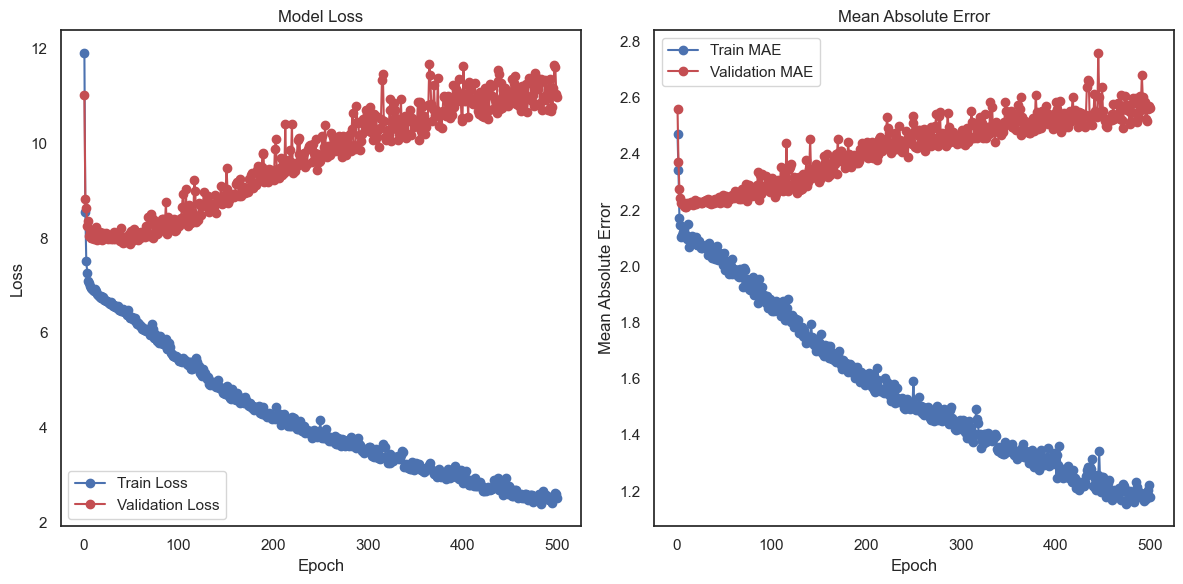

In [32]:
history = OCDHistory.history

epochs = range(1, len(history['loss']) + 1)  # Number of epochs

plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history['loss'], 'bo-', label='Train Loss')
plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot mean absolute error
plt.subplot(1, 2, 2)
plt.plot(epochs, history['mean_absolute_error'], 'bo-', label='Train MAE')
plt.plot(epochs, history['val_mean_absolute_error'], 'ro-', label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()